# Predicting User Engagement in Instagram for Science Posts
Elaborated by: MCT4

Team members: 
* Wilfried Tcheumaha
* Stephanie Rivera
* Maximilian Reuss
* Spandan Chowdhury
* Aishwarya Kadam


Note: To run this code, there is no need to dowloand the particular .CSV files, all of them are dynamically obtained from a dropbox route. The only requirement is that this file should be executed in Google Collab.

## Libraries

In [ ]:

# General Libraries
import warnings
warnings.filterwarnings('ignore')

# Data manipulation/analysis
import numpy as np
import pandas as pd
import calendar
 


In [ ]:
#Visualization

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set(style="darkgrid")
##%matplotlib inline
sns.set(style="whitegrid", context='talk')

 

In [ ]:
# Text preprocessing/analysis
import nltk
nltk.download('stopwords')

nltk.download('punkt') # for sent_tokenize
from nltk import word_tokenize, sent_tokenize, FreqDist

from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Lexicons Installation
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=7e43705eb6262ad7371d0f136d1b12d10c63b70034720d62fda167521454876d
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:


# Text preprocessing/analysis
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#Lexicons
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from afinn import Afinn
from textblob import TextBlob

from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
#from spellchecker import SpellChecker


# Modelling

seed = 123 # Set random seed
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline



In [ ]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Dataset First Overview

This section performs the following: 


*   General description or statistics from numerical variables
*   Dealing with duplicates post issues
*   Features creation related to the published date



In [ ]:
#Full dataset with LUKE
path = 'https://www.dropbox.com/s/u6o76dtrbv34trw/FinalDataset_Instagram_Phase3wLIWC.csv?dl=1'

#Simplified dataset without LUKE 
#path = 'https://www.dropbox.com/s/o1onns1tqulo6zn/FinalDataset_Instagram.csv?dl=1'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(2)

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,https://www.instagram.com/p/Cgr-hv8Oavg/,"BORSCHT {GLUTEN-FREE, DAIRY-FREE & FAT-FREE OP...",167,11182.00,2022-07-31T18:43:48.000Z,False,Photo,"Photo shared by Medical Medium® on July 31, 20...",https://www.instagram.com/medicalmedium,medicalmedium,...,0.00,0.00,0.00,21.43,4.46,6.55,0.00,0.00,0.30,10.12
1,https://www.instagram.com/p/CgrcQIIuNwz/,Repost from @loveinhealing\n•\nYou CAN heal yo...,310,16947.00,2022-07-31T13:44:47.000Z,False,Video,NaN,https://www.instagram.com/medicalmedium,medicalmedium,...,0.00,0.00,0.00,19.23,5.77,0.00,0.00,3.85,3.85,5.77


In [ ]:
df.shape

(4210, 138)

In [ ]:
df['postUrl'].nunique()

2740

In [ ]:
#Address the duplicates of post when it comes to slideCars or carrusel
df.groupby('postUrl')['postUrl'].count().sort_values(ascending=False).head(10)
#grouped.sort_values('mygroups', ascending=False)

postUrl
https://www.instagram.com/p/CbqqvR4OxF6/    10
https://www.instagram.com/p/Ca5by4JvvuD/    10
https://www.instagram.com/p/Cd5Fuv4OCk-/    10
https://www.instagram.com/p/CgolHIjOlnn/    10
https://www.instagram.com/p/Cd5Cjo-unGC/    10
https://www.instagram.com/p/Cd1HcZcApbs/    10
https://www.instagram.com/p/Ccbmv8yPp7J/    10
https://www.instagram.com/p/CgSEIoDJMKM/    10
https://www.instagram.com/p/Cgmv2B7pYa_/    10
https://www.instagram.com/p/CeMDPSIFquJ/    10
Name: postUrl, dtype: int64

In [ ]:
df = df.loc[df['postUrl'] != df['postUrl'].shift()]

In [ ]:
df.shape

(2740, 138)

In [ ]:
df['postUrl'].nunique()

2740

In [ ]:
df.head(2)

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,https://www.instagram.com/p/Cgr-hv8Oavg/,"BORSCHT {GLUTEN-FREE, DAIRY-FREE & FAT-FREE OP...",167,11182.00,2022-07-31T18:43:48.000Z,False,Photo,"Photo shared by Medical Medium® on July 31, 20...",https://www.instagram.com/medicalmedium,medicalmedium,...,0.00,0.00,0.00,21.43,4.46,6.55,0.00,0.00,0.30,10.12
1,https://www.instagram.com/p/CgrcQIIuNwz/,Repost from @loveinhealing\n•\nYou CAN heal yo...,310,16947.00,2022-07-31T13:44:47.000Z,False,Video,NaN,https://www.instagram.com/medicalmedium,medicalmedium,...,0.00,0.00,0.00,19.23,5.77,0.00,0.00,3.85,3.85,5.77


In [ ]:
#From ISO format to normal format
df['pubDate'] = pd.to_datetime(df['pubDate']).dt.tz_convert(None)


In [ ]:

#From CET to US EST timezone
#eastern = pytz.timezone('US/Eastern')
df['pubDate'] = df['pubDate'].dt.tz_localize('CET').dt.tz_convert('America/New_York')

In [ ]:
#Validation
df.filter(["postUrl","pubDate","pubDate_new"]).head(2)

,postUrl,pubDate
0,https://www.instagram.com/p/Cgr-hv8Oavg/,2022-07-31 12:43:48-04:00
1,https://www.instagram.com/p/CgrcQIIuNwz/,2022-07-31 07:44:47-04:00


In [ ]:
df['day'] = df.pubDate.dt.day
df['month'] = df.pubDate.dt.month

df['hour'] = df.pubDate.dt.hour
df['minute'] = df.pubDate.dt.minute

df['weekday'] = df.pubDate.dt.weekday

In [ ]:

df['monthName']= df['month'].apply(lambda x: calendar.month_name[x])

df['dayName'] = df['pubDate'].dt.day_name()


In [ ]:
#Deleting other months
df.drop(df[~df['month'].isin([3,4,5,6,7])].index, inplace=True)

In [ ]:
df['monthName'].value_counts()

March    596
May      550
June     538
July     527
April    527
Name: monthName, dtype: int64

In [ ]:
df['monthName'] = df['monthName'].astype('category')

from pandas.api.types import CategoricalDtype

months_order = ["March","April","May","June","July"]
covered_type = CategoricalDtype(categories=months_order, ordered=True)

df['monthName'] = df['monthName'].cat.reorder_categories(months_order, ordered=True)

df['dayName'] = df['dayName'].astype('category')

from pandas.api.types import CategoricalDtype

day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
covered_type = CategoricalDtype(categories=day_order, ordered=True)

df['dayName'] = df['dayName'].cat.reorder_categories(day_order, ordered=True)

In [ ]:
df.head(2)

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,Exclam,Apostro,OtherP,day,month,hour,minute,weekday,monthName,dayName
0,https://www.instagram.com/p/Cgr-hv8Oavg/,"BORSCHT {GLUTEN-FREE, DAIRY-FREE & FAT-FREE OP...",167,11182.00,2022-07-31 12:43:48-04:00,False,Photo,"Photo shared by Medical Medium® on July 31, 20...",https://www.instagram.com/medicalmedium,medicalmedium,...,0.00,0.30,10.12,31,7,12,43,6,July,Sunday
1,https://www.instagram.com/p/CgrcQIIuNwz/,Repost from @loveinhealing\n•\nYou CAN heal yo...,310,16947.00,2022-07-31 07:44:47-04:00,False,Video,NaN,https://www.instagram.com/medicalmedium,medicalmedium,...,3.85,3.85,5.77,31,7,7,44,6,July,Sunday


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df.describe()

,commentCount,likeCount,postId,viewCount,general_topic,Segment,WC,Analytic,Clout,Authentic,...,Comma,QMark,Exclam,Apostro,OtherP,day,month,hour,minute,weekday
count,2738.00,2735.00,2738.00,784.00,2732.00,2738.00,2738.00,2732.00,2732.00,2732.00,...,2732.00,2732.00,2732.00,2732.00,2732.00,2738.00,2738.00,2738.00,2738.00,2738.00
mean,291.83,16417.80,1036803841980492021760.00,264405.62,3.29,1.00,121.84,66.40,61.27,38.92,...,4.27,0.73,0.77,1.75,8.43,15.75,4.95,10.90,23.18,2.93
std,461.37,26404.37,54103170011651863740416.00,491671.15,2.40,0.00,107.05,26.23,29.77,31.46,...,4.08,2.34,2.07,2.44,13.19,8.76,1.42,4.36,19.91,1.98
min,0.00,80.00,2780000000000000000.00,1766.00,0.00,1.00,0.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00
25%,72.00,2605.00,2810000000000000000.00,39716.00,1.00,1.00,35.00,51.00,40.06,11.51,...,0.00,0.00,0.00,0.00,2.94,8.00,4.00,7.00,4.00,1.00
50%,151.00,9435.00,2840000000000000000.00,123122.50,2.00,1.00,90.00,73.59,62.84,29.49,...,3.83,0.00,0.00,1.09,5.17,16.00,5.00,10.00,20.00,3.00
75%,302.00,16622.00,2866334631535545344.00,252371.25,6.00,1.00,182.00,87.01,90.44,66.20,...,6.47,0.30,0.74,2.44,9.09,23.00,6.00,14.00,42.00,5.00
max,6023.00,348846.00,2830999999999999809159168.00,5475836.00,7.00,1.00,412.00,99.00,99.00,99.00,...,50.00,33.33,33.33,33.33,222.22,31.00,7.00,23.00,59.00,6.00


## Data Wrangling & Cleaning

In this section we deal with the following tasks:



* Adressing null values within each column
* Imputation of values in the categorial values
* Deleting posts that were "reposted" in collaboration with other usernames
* Evaluating frequency of values within each column
* Creating target metrics : Engagement rate and Engagement level
* Handling Outliers
* Adressing anonimization of influencers for further analysis


In [ ]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
miss_values = null_values(df)
miss_values.head(10)

Dataframe has 145 columns.
There are 129 columns that have missing values.


,Missing Values,% of Total Values
caption,2699,98.60
ad_type,2158,78.80
viewCount,1954,71.40
engtrigger_type,1791,65.40
post_structure,398,14.50
profileUrl,122,4.50
query,122,4.50
description,6,0.20
wellness,6,0.20
money,6,0.20


In [ ]:
#Deleting posts where description is null
df = df[df['description'].notna()]
df = df[df['likeCount'].notna()]

In [ ]:
## deleting/fixing the other usernames since those are collaborating posts

##df.loc[df['username'].isin(['shawnmodel','lewishowes','onecommune']), 'username'] = 'drmarkhyman'

df.drop(df[~df['username'].isin(['drjamesdinic','drmarkhyman','medicalmedium','drmercola','doc_amen',
                                 'the.holistic.psychologist','drwillcole','drjoshaxe','saragottfriedmd','doc_amen','parsleyhealth'])].index, inplace=True)

In [ ]:
df['ad_type'].value_counts()

per    464
ext    105
Per      1
Na       1
Name: ad_type, dtype: int64

In [ ]:
df["content_type"].value_counts()

informational post    2306
other                  253
patient testimony       71
personal post           65
informational            1
Name: content_type, dtype: int64

In [ ]:
df[df["content_type"]=="informational_post"]['post_structure'].value_counts()


Series([], Name: post_structure, dtype: int64)

In [ ]:
#replece content_type spaces
df['content_type'] = df['content_type'].str.replace(' ','_')

#assign too the most common value
df['general_topic'].fillna(value=1,inplace=True)
df['content_type'] = df['content_type'].replace('informational','informational_post')
df['content_type'].fillna(value='informational_post',inplace=True)

#assigning new value since those are na
df['ad_type'].fillna(value='no_ad',inplace=True)
df['engtrigger_type'].fillna(value=9,inplace=True)

#Making feature numeric

#df['post_structure'] = df['post_structure'].str.replace('.0','')
df['post_structure'] = df['post_structure'].replace('other','9')
df['post_structure'] = df['post_structure'].replace('Na',None)
#df['post_structure'].fillna(value=10,inplace=True)

df['post_structure']= df['post_structure'].astype(float)

In [ ]:
#handling annotation for ad type
df['ad_type'] = df['ad_type'].str.replace('Per','per')
df['ad_type'] = df['ad_type'].str.replace('Na','no_ad')

In [ ]:
df.shape

(2697, 145)

In [ ]:
##Checking for multicolinearity

def top_entries(df):
    mat = df.corr().abs()
    
    # Remove duplicate and identity entries
    mat.loc[:,:] = np.tril(mat.values, k=-1)
    mat = mat[mat>0]

    # Unstack, sort ascending, and reset the index, so features are in columns
    # instead of indexes (allowing e.g. a pretty print in Jupyter).
    # Also rename these it for good measure.
    return (mat.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={
                 "level_0": "feature_a",
                 "level_1": "feature_b",
                 0: "correlation"
             }))

top_entries(df).head(10)

,feature_a,feature_b,correlation
0,Cognition,cogproc,0.97
1,Conversation,assent,0.93
2,AllPunc,OtherP,0.91
3,Linguistic,function,0.89
4,pronoun,ppron,0.86
5,Culture,tech,0.86
6,likeCount,viewCount,0.86
7,Social,socrefs,0.84
8,commentCount,likeCount,0.83
9,commentCount,viewCount,0.81


In [ ]:
df.shape

(2697, 145)

In [ ]:
# Making features boolean
ad_feature = [1 if i == "y" else 0 for i in df['ad'] ]
df['ad'] = ad_feature

trigger_feature = [1 if i == "y" else 0 for i in df['engtrigger'] ]
df['engtrigger'] = trigger_feature

In [ ]:
#values should be between 1 and 7
df['general_topic'] = df['general_topic'].replace(0,1)

In [ ]:
#Addressing features that are supposed to be categories

def set_engtrigger(row):
    if row['engtrigger_type'] == 1:
        val = 'question'
    elif row['engtrigger_type'] == 4:
        val = 'bold_claim'
    elif row['engtrigger_type'] == 6:
        val = 'connecting_with_audience'
    else:  val= 'no_eng_trigger'

    return val

df['engtrigger_type'] = df.apply(set_engtrigger, axis=1)

In [ ]:

def set_topic(row):
    if row['general_topic'] == 1:
        val = 'nutrition'
    elif row['general_topic'] == 2:
        val = 'general_health'
    elif row['general_topic'] == 3:
        val = 'environmental'
    elif row['general_topic'] == 4:
        val = 'inmunology'
    elif row['general_topic'] == 5:
        val = 'cancer'
    elif row['general_topic'] == 6:
        val = 'mental_health' 
    else:  val= 'other'

    return val

df['general_topic'] = df.apply(set_topic, axis=1)

In [ ]:
def set_poststructure(row):
    if row['post_structure'] == 2:
        val = 'long_information_text'
    elif row['post_structure'] == 3:
        val = 'short_information_text'
    elif row['post_structure'] == 4:
        val = 'header'
    elif row['post_structure'] == 6:
        val = 'diagram_with_text_only'
    elif row['post_structure'] == 7:
        val = 'facsheet_without_graphics'
    elif row['post_structure'] == 8:
        val = 'infographic'
    elif row['post_structure'] == 9:
        val = 'other'
    elif row['content_type'] == 'informational_post':
        val = 'other'
    else:  val= 'no_informational_post'

    return val

df['post_structure'] = df.apply(set_poststructure, axis=1)

In [ ]:
df['username'].value_counts()

drjamesdinic                 565
drmarkhyman                  435
medicalmedium                408
drmercola                    297
doc_amen                     296
the.holistic.psychologist    240
drwillcole                   146
drjoshaxe                    119
saragottfriedmd              114
parsleyhealth                 77
Name: username, dtype: int64

In [ ]:
#Adding followers count
#Static count 1st batch - Aug 12

def f(row):
    if row['username'] == 'drmarkhyman':
        val = 2114680
    elif row['username'] == 'drmercola':
        val = 440626
    elif row['username'] == 'medicalmedium':
        val = 4081355
    elif row['username'] == 'parsleyhealth':
        val = 149273
    elif row['username'] == 'drjamesdinic':
        val = 877078
    elif row['username'] == 'doc_amen':
        val = 1100022
    elif row['username'] == 'the.holistic.psychologist':
        val = 5400231
    elif row['username'] == 'drwillcole':
        val = 358023
    elif row['username'] == 'saragottfriedmd':
        val = 192012
    else:  val = 862101
    return val

df['nfollowers'] = df.apply(f, axis=1)

In [ ]:
#Eng_rate columns -- METRIC to define the study

df['eng_rate'] = (df['likeCount']+ df['commentCount'])*100/(df['nfollowers'])

target_list = ["success" if i>= 0.63 else "failure" for i in df['eng_rate'] ]

df['eng_level'] = target_list

In [ ]:
df['eng_rate'].describe()

count   2697.00
mean       0.92
std        0.85
min        0.04
25%        0.30
50%        0.66
75%        1.32
max       11.35
Name: eng_rate, dtype: float64

In [ ]:
df['eng_level'].value_counts()

success    1373
failure    1324
Name: eng_level, dtype: int64

In [ ]:
#Cleaning for outliers 
#sns.boxplot(x=df["eng_rate"])

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['eng_rate']))
#print(z)

threshold = 3
arr = np.where(z > 3)

outliers = arr[0].tolist()

#outliers = arr.tolist()
print(outliers)

[826, 882, 1038, 1342, 1359, 1423, 1480, 1499, 1503, 1541, 1696, 1728, 1755, 1761, 1767, 1771, 1773, 1776, 1780, 1790, 1803, 1834, 1868, 1876, 1881, 1894, 1910, 1927, 1957, 2027, 2088, 2094, 2265, 2358, 2375, 2409, 2419, 2443, 2692]


In [ ]:
#Deleting the outliers
df_outliers = df.iloc[outliers]
df = df[~df.postUrl.isin(df_outliers.postUrl)]
df.shape

(2658, 148)

In [ ]:
df['eng_rate'].describe()

count   2658.00
mean       0.86
std        0.72
min        0.04
25%        0.30
50%        0.63
75%        1.29
max        3.47
Name: eng_rate, dtype: float64

In [ ]:
#Filtering 
#df[df['eng_rate']>3].filter(["postUrl","username","likeCount","commentCount","nfollowers","eng_rate"])
#df[df['content_type'].isna()].filter(["postUrl","username","likeCount","commentCount","nfollowers","eng_rate"])

In [ ]:
#working with hashtags
import re

df["hashtag"] = df["description"].apply(lambda x: re.findall(r"#(\w+)", x))
df["num_hashtags"] = df["hashtag"].apply(len)
 
df['description'] = df['description'].apply(lambda x:re.sub('#[^\s]+','',x))


In [ ]:
#Anonimizing data 
#removing username related words in the description
words = ['medical medium','mark hyman','Mark Hyman','Mercola','dr mercola','parsleyhealth',
         'drjamesdinic','drmarkhyman','medicalmedium','drmercola','doc_amen',
         'the.holistic.psychologist','drwillcole','drjoshaxe','saragottfriedmd']

for word in words:
  mel_count=df['description'].str.contains(word).sum()
  if mel_count>0:
    print ("There are {m} {w}".format(m=mel_count, w=word))


df['description'] = df['description'].str.replace(r"medical medium", '')
df['description'] = df['description'].str.replace(r"Mercola", '')
df['description'] = df['description'].str.replace(r"medicalmedium", '')
df['description'] = df['description'].str.replace(r"drjamesdinic", '')
df['description'] = df['description'].str.replace(r"doc_amen", '')
df['description'] = df['description'].str.replace(r"drwillcole", '')
df['description'] = df['description'].str.replace(r"saragottfriedmd", '')
df['description'] = df['description'].str.replace(r"drjoshaxe", '')

There are 4 medical medium
There are 1 Mercola
There are 468 drjamesdinic
There are 85 medicalmedium
There are 6 doc_amen
There are 30 drwillcole
There are 7 drjoshaxe
There are 7 saragottfriedmd


In [ ]:
#anonimizing usernames
 
def username_anonymus(row):
    if row['username'] == 'drmarkhyman':
        val = "influencer_1"
    elif row['username'] == 'drmercola':
        val = "influencer_2"
    elif row['username'] == 'medicalmedium':
        val = "influencer_3"
    elif row['username'] == 'parsleyhealth':
        val = "influencer_4"
    elif row['username'] == 'drjamesdinic':
        val = 'influencer_5'
    elif row['username'] == 'doc_amen':
        val = 'influencer_6'
    elif row['username'] == 'the.holistic.psychologist':
        val = 'influencer_7'
    elif row['username'] == 'drwillcole':
        val = 'influencer_8'
    elif row['username'] == 'saragottfriedmd':
        val = 'influencer_9'
    else:  val = 'influencer_10'
    return val

df['username'] = df.apply(username_anonymus, axis=1)

In [ ]:
df['username'].value_counts()

influencer_5     543
influencer_1     432
influencer_3     408
influencer_2     297
influencer_6     290
influencer_7     233
influencer_8     145
influencer_10    119
influencer_9     114
influencer_4      77
Name: username, dtype: int64

In [ ]:
#pd.set_option('display.max_colwidth', 50 ) Change to None to see full text
df[['postUrl', 'eng_rate']].sort_values('eng_rate', ascending=False)

,postUrl,eng_rate
4083,https://www.instagram.com/p/Cfpe2igu41c/,3.47
3230,https://www.instagram.com/p/CfTmOZ2u0WD/,3.46
3225,https://www.instagram.com/p/CfWRbiFO49K/,3.45
2199,https://www.instagram.com/p/CewBqHDrHeU/,3.38
3779,https://www.instagram.com/p/Ce17I7jDPN7/,3.34
...,...,...
2959,https://www.instagram.com/p/CeCHnSCIz5C/,0.05
1385,https://www.instagram.com/p/Cc2vs5fLyk1/,0.05
1522,https://www.instagram.com/p/CbKmVN2smHM/,0.04
1512,https://www.instagram.com/p/CbQZEmnNubt/,0.04


In [ ]:
df.shape

(2658, 150)

## Data Exploration


In this section we approach the following tasks:

*   Univariate data exploration for numerical and descriptive variables
*   Bivariate data exploration for numerical and descriptive variables
*   Engagement Rate exploration



In [ ]:
#sns.set(rc={'figure.figsize':(10,5), 'legend.frameon':True})
sns.set_context("paper")
sns.set_style("white", {
        "font.family": "serif",
       "font.serif": ["Times", "Palatino", "serif"] 
    })

In [ ]:
df2 = df[['nfollowers', 'likeCount', 'commentCount','eng_rate']]

In [ ]:
df2.describe()

,nfollowers,likeCount,commentCount,eng_rate
count,2658.00,2658.00,2658.00,2658.00
mean,1862679.02,15605.88,280.91,0.86
std,1650727.62,23424.63,432.63,0.72
min,149273.00,80.00,0.00,0.04
25%,862101.00,2620.25,72.25,0.30
50%,1100022.00,9373.50,150.00,0.63
75%,2114680.00,16343.75,296.00,1.29
max,5400231.00,176590.00,6023.00,3.47


In [ ]:
##df2 = df[['nfollowers', 'likeCount', 'commentCount', 'hour']]
#sns.pairplot(df2, height=3.5);  

In [ ]:
#fig.update_layout(
#    title="Plot Title",
#    xaxis_title="X Axis Title",
#    yaxis_title="Y Axis Title",
#    legend_title="Legend Title",
#    font=dict(
#        family="Courier New, monospace",
#        size=18,
#        color="RebeccaPurple"
#    )
#)


In [ ]:
df["engtrigger"].value_counts() 

0    1740
1     918
Name: engtrigger, dtype: int64

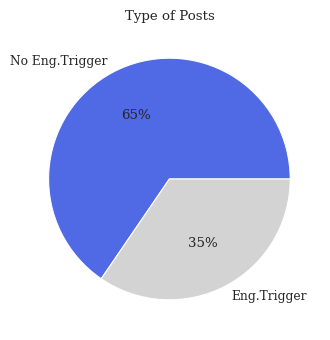

In [ ]:
state = round(df["engtrigger"].value_counts() / len(df["engtrigger"]) * 100,2)
labels = ['No Eng.Trigger', 'Eng.Trigger']
values = list(state.values)
plt.title('Type of Posts')
plt.pie(values, labels = labels, colors = ['#5069e4','lightgray'], autopct='%.0f%%')
plt.show()

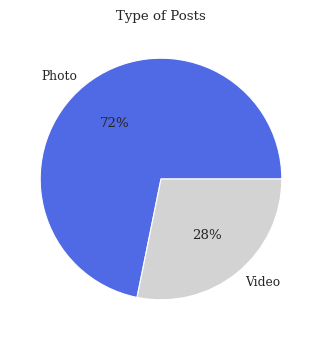

In [ ]:
state = round(df["type"].value_counts() / len(df["type"]) * 100,2)
labels = ['Photo', 'Video']
values = list(state.values)
plt.title('Type of Posts')
plt.pie(values, labels = labels, colors = ['#5069e4','lightgray'], autopct='%.0f%%')
plt.show()

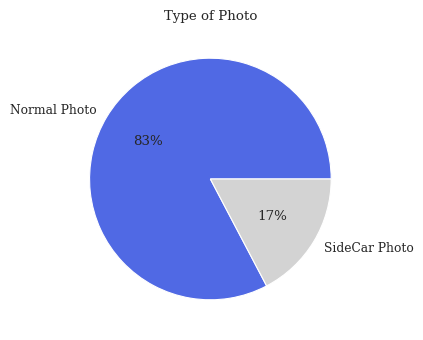

In [ ]:
state = round(df[df["type"]=="Photo"]["isSidecar"].value_counts() / len(df["isSidecar"]) * 100,2)
labels = ['Normal Photo', 'SideCar Photo']
values = list(state.values)
plt.title('Type of Photo')
plt.pie(values, labels = labels, colors = ['#5069e4','lightgray'], autopct='%.0f%%')
plt.show()

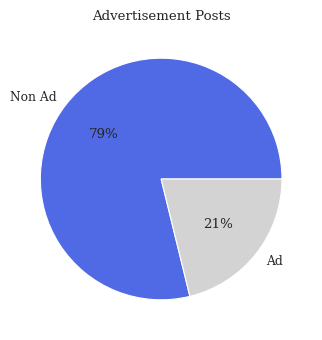

In [ ]:
state = round(df["ad"].value_counts() / len(df["ad"]) * 100,2)
labels = ['Non Ad', 'Ad']
values = list(state.values)
plt.title('Advertisement Posts')
plt.pie(values, labels = labels, colors = ['#5069e4','lightgray'], autopct='%.0f%%')
plt.show()

In [ ]:
df["ad_type"].value_counts()

no_ad    2094
per       462
ext       102
Name: ad_type, dtype: int64

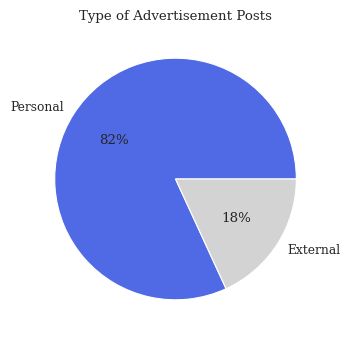

In [ ]:
state = round(df[df["ad"]==1]["ad_type"].value_counts() / len(df["ad_type"]) * 100,2)
labels = ['Personal', 'External']
values = list(state.values)
plt.title('Type of Advertisement Posts')
plt.pie(values, labels = labels, colors = ['#5069e4','lightgray'], autopct='%.0f%%')
plt.show()

In [ ]:
import plotly.express as px

print(px.colors.qualitative.Bold)

['rgb(127, 60, 141)', 'rgb(17, 165, 121)', 'rgb(57, 105, 172)', 'rgb(242, 183, 1)', 'rgb(231, 63, 116)', 'rgb(128, 186, 90)', 'rgb(230, 131, 16)', 'rgb(0, 134, 149)', 'rgb(207, 28, 144)', 'rgb(249, 123, 114)', 'rgb(165, 170, 153)']


In [ ]:
import plotly.express as px
 
state = round(df["general_topic"].value_counts() / len(df["general_topic"]) * 100,2)
labels = df["general_topic"].unique().tolist()
 
fig = px.pie(values=state, names=labels, 
             color_discrete_sequence=['#636EFA','darkblue','lightblue','#1e81b0','darkgray','lightgray','#E2DCDC'])
 
fig.update_traces(textposition='outside', 
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=12)
#ig.update_layout(title_text='Post General Topic', title_x=0.5)

fig.update_layout(
    showlegend=False,
    font={'size': 10},
    font_color = 'black',
    title={'text': '<b>Post General Topic</b>', 'font': {'size': 14}},
    font_family = 'Times New Roman',
    title_x=0.5
)
fig.show()

In [ ]:
import plotly.express as px
 
state = round(df["content_type"].value_counts() / len(df["content_type"]) * 100,2)
labels = df["content_type"].unique().tolist()
 
fig = px.pie(values=state, names=labels, 
             color_discrete_sequence=['#636EFA','darkblue','lightblue','#1e81b0','darkgray','lightgray','#E2DCDC'])
 
fig.update_traces(textposition='outside', 
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=12)
#ig.update_layout(title_text='Post General Topic', title_x=0.5)

fig.update_layout(
    showlegend=False,
    font={'size': 10},
    font_color = 'black',
    title={'text': '<b>Post Content Type </b>', 'font': {'size': 14}},
    font_family = 'Times New Roman',
    title_x=0.5
)
fig.show()

In [ ]:
df[df["content_type"]=="informational_post"]["post_structure"].value_counts() 

header                       1011
short_information_text        321
facsheet_without_graphics     299
long_information_text         299
other                         179
infographic                   145
diagram_with_text_only         16
Name: post_structure, dtype: int64

In [ ]:
 df["content_type"].value_counts() 

informational_post    2270
other                  253
patient_testimony       71
personal_post           64
Name: content_type, dtype: int64

In [ ]:
import plotly.express as px
 
state = round(df[df["content_type"]=="informational_post"]["post_structure"].value_counts() / len(df["post_structure"]) * 100,2)
labels = df[df["content_type"]=="informational_post"]["post_structure"].value_counts().index.tolist()
 
fig = px.pie(values=state, names=labels, 
             color_discrete_sequence=['#636EFA','darkblue','lightblue','#1e81b0','darkgray','lightgray','#E2DCDC'])
 
fig.update_traces(textposition='outside', 
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=12)
#ig.update_layout(title_text='Post General Topic', title_x=0.5)

fig.update_layout(
    showlegend=False,
    font={'size': 10},
    font_color = 'black',
    title={'text': '<b>Informational Post Structure </b>', 'font': {'size': 14}},
    font_family = 'Times New Roman',
    title_x=0.52
)
fig.show()

Text(0, 0.5, 'Number of posts')

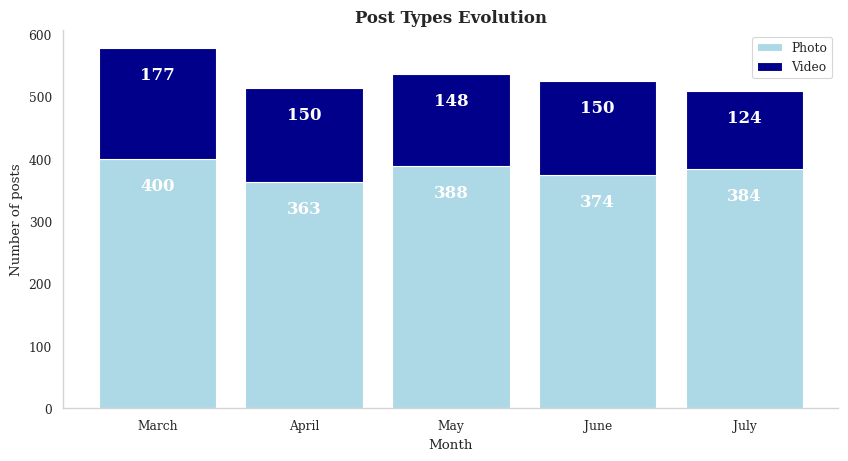

In [ ]:
#Building set for plotting
aggloan = df.groupby(['monthName','type']).size().unstack().fillna(0)

# set plot style: grey grid in the background:
#sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 5))

colors = ['lightblue', 'darkblue']
# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(aggloan))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
for i, col in enumerate(aggloan.columns):
    ax.bar(aggloan.index, aggloan[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(aggloan[col])
    
# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -50
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
    ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height(),0).astype(str)[:-2],
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=12
  )    

ax.set_title('Post Types Evolution',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
ax.legend()

ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Month')
ax.set_ylabel('Number of posts')

## Post Impressions

In [ ]:
import plotly.express as px

views = df["viewCount"].sum()
likes = df["likeCount"].sum()
comments = df["commentCount"].sum()


labels = ['viewCount','likeCount','commentCount']
values = [views, likes, comments,]

fig = px.pie(df, values=values, names=labels,
             title='Impressions on instagram posts from various sources', hole=0.5)

fig.show()
          

Text(0.5, 1.0, 'Number of likes')

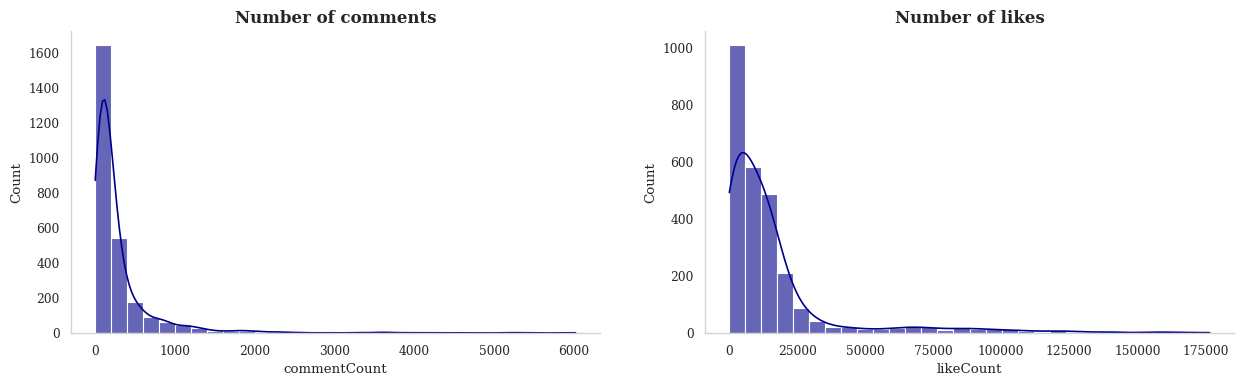

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))

#plt.figure(figsize=(6, 3))
#plt.style.use('fivethirtyeight')
#plt.title("Number of views from posts")
sns.histplot(df['commentCount'],ax=axs[0],kde=True, bins=30,color= 'darkblue',alpha=0.6)
sns.histplot(df['likeCount'],ax=axs[1],kde=True,bins=30,color= 'darkblue',alpha=0.6)
 
axs[0].spines['left'].set_color('lightgray')
axs[0].spines['bottom'].set_color('lightgray')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('lightgray')
axs[1].spines['bottom'].set_color('lightgray')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[0].set_title('Number of comments',fontdict= { 'fontsize': 12, 'fontweight':'bold'})
axs[1].set_title('Number of likes',fontdict= { 'fontsize': 12, 'fontweight':'bold'})

In [ ]:

#plt.figure(figsize=(6, 3))
#plt.title("Number of comments from posts")
#sns.distplot(df['viewCount'])
#plt.show()

In [ ]:
var_hour_like = df.groupby(['hour'], as_index=False)['likeCount'].agg(['mean', 'count','sum']).reset_index()

var_hour_like['likeVar'] = var_hour_like['sum'].pct_change()
var_hour_like['likeVar'] = var_hour_like['likeVar']*100



var_day_like = df.groupby(['dayName'], as_index=False)['likeCount'].agg(['mean', 'count','sum']).reset_index()

var_day_like['likeVar'] = var_day_like['sum'].pct_change()
var_day_like['likeVar'] = var_day_like['likeVar']*100

In [ ]:
var_day_like.head(2)

,dayName,mean,count,sum,likeVar
0,Monday,14842.69,372,5521481.00,NaN
1,Tuesday,15327.84,404,6192448.00,12.15


In [ ]:
var_hour_like.dtypes

hour         int64
mean       float64
count        int64
sum        float64
likeVar    float64
dtype: object

In [ ]:
var_hour_like['likeVar'].describe()

count     23.00
mean     198.24
std      838.06
min      -92.88
25%      -33.62
50%      -13.73
75%       41.23
max     3987.78
Name: likeVar, dtype: float64

In [ ]:
var_hour_like['sum'] = var_hour_like['sum']/1000

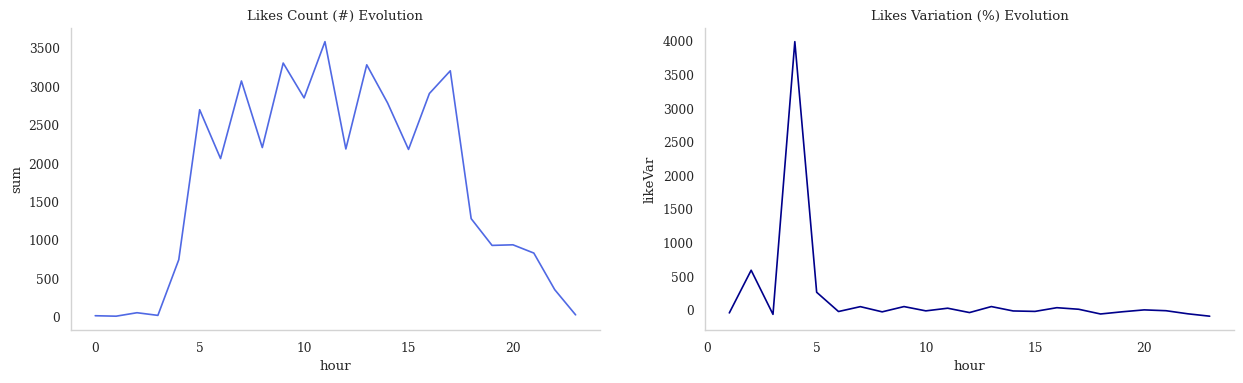

In [ ]:
#plt.figure(dpi=120)


#kick_data_goal_pledge = df[(df.state == 'successful')]
#kick_data_goal_pledg_f = df[(df.state == 'successful')]



fig, axs = plt.subplots(ncols=2,figsize=(15,4))

sns.lineplot(  x= var_hour_like['hour'], y=var_hour_like['sum'], color='#5069e4',ax=axs[0])



sns.lineplot(  x= var_hour_like['hour'], y=var_hour_like['likeVar'], color='darkblue',ax=axs[1])


#axs[1].set(ylim=(-1000, 4000))
axs[0].set_title("Likes Count (#) Evolution")
axs[1].set_title("Likes Variation (%) Evolution")
 
 
axs[0].spines['left'].set_color('lightgray')
axs[0].spines['bottom'].set_color('lightgray')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('lightgray')
axs[1].spines['bottom'].set_color('lightgray')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)



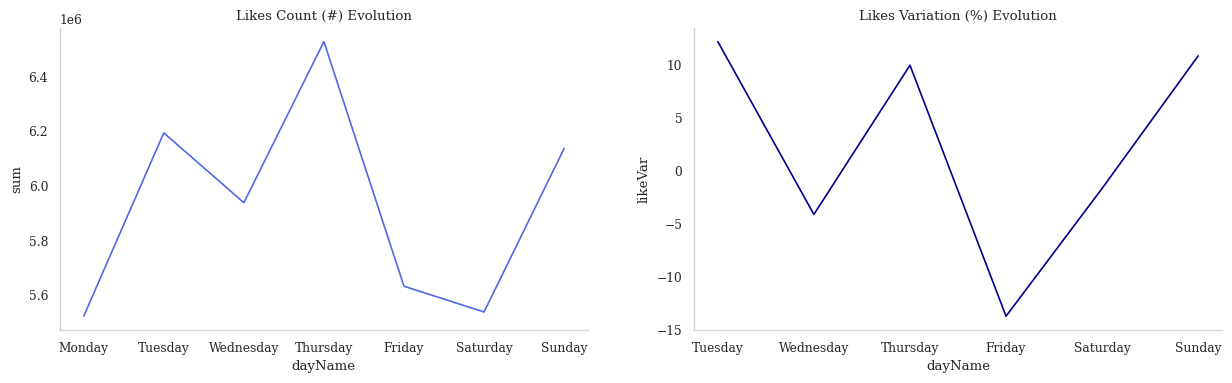

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))

sns.lineplot(  x= var_day_like['dayName'], y=var_day_like['sum'], color='#5069e4',ax=axs[0])
sns.lineplot(  x= var_day_like['dayName'], y=var_day_like['likeVar'], color='darkblue',ax=axs[1])

axs[0].set_title("Likes Count (#) Evolution")
axs[1].set_title("Likes Variation (%) Evolution")
 
axs[0].spines['left'].set_color('lightgray')
axs[0].spines['bottom'].set_color('lightgray')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('lightgray')
axs[1].spines['bottom'].set_color('lightgray')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)


In [ ]:
var_hour_like['sum'] = var_hour_like['sum']/1000
var_day_like['sum'] = var_day_like['sum']/1000000

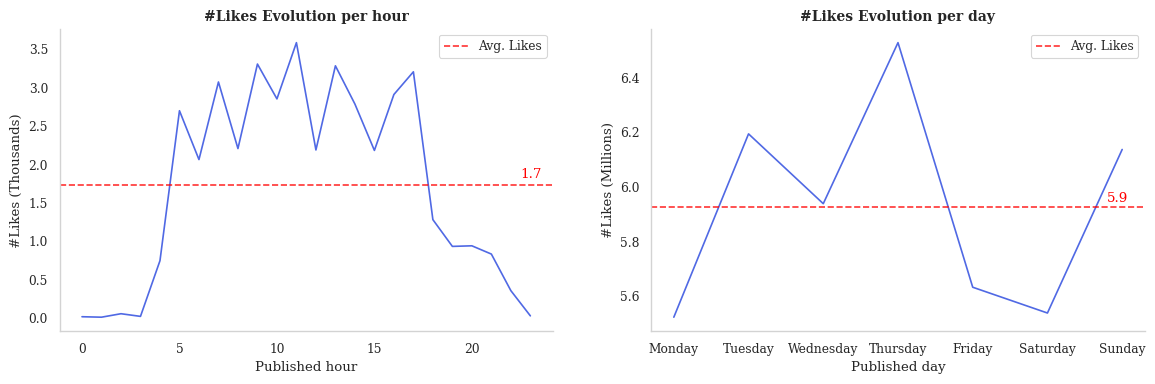

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(14,4))



sns.lineplot(  x= var_hour_like['hour'], y=var_hour_like['sum'], color='#5069e4',ax=axs[0])


sns.lineplot(  x= var_day_like['dayName'], y=var_day_like['sum'], color='#5069e4',ax=axs[1])
y_mean_0 = var_hour_like['sum'].mean()
y_mean_1 = var_day_like['sum'].mean()


axs[0].axhline(y=y_mean_0, color='red', linestyle='--', alpha=0.8,label= 'Avg. Likes')
axs[1].axhline(y=y_mean_1, color='red', linestyle='--', alpha=0.8,label= 'Avg. Likes')

axs[0].text(22.5,y_mean_0+0.1,round(y_mean_0,1),color='red')
axs[1].text(5.8,y_mean_1+0.02,round(y_mean_1,1),color='red')

axs[0].legend()
axs[1].legend()

axs[0].set_title("#Likes Evolution per hour",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
axs[1].set_title("#Likes Evolution per day",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
 
axs[0].spines['left'].set_color('lightgray')
axs[0].spines['bottom'].set_color('lightgray')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('lightgray')
axs[1].spines['bottom'].set_color('lightgray')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[1].set_xlabel('Published day') 
axs[0].set_xlabel('Published hour') 

axs[0].set_ylabel('#Likes (Thousands)') 
axs[1].set_ylabel('#Likes (Millions)') 

plt.show()

In [ ]:
var_hour_comm = df.groupby(['hour'], as_index=False)['commentCount'].agg(['mean', 'count','sum']).reset_index()

var_hour_comm['commentVar'] = var_hour_comm['sum'].pct_change()
var_hour_comm['commentVar'] = var_hour_comm['commentVar']*100


var_day_comm = df.groupby(['dayName'], as_index=False)['commentCount'].agg(['mean', 'count','sum']).reset_index()

var_day_comm['commentVar'] = var_day_comm['sum'].pct_change()
var_day_comm['commentVar'] = var_day_comm['commentVar']*100

In [ ]:
var_hour_comm.head(26)

,hour,mean,count,sum,commentVar
0,0,522.00,1,522,NaN
1,1,92.50,2,185,-64.56
2,2,331.25,4,1325,616.22
3,3,228.00,1,228,-82.79
4,4,212.90,50,10645,4568.86
5,5,213.61,186,39731,273.24
6,6,219.38,162,35539,-10.55
7,7,176.23,356,62739,76.54
8,8,162.18,256,41517,-33.83
9,9,363.96,170,61874,49.03


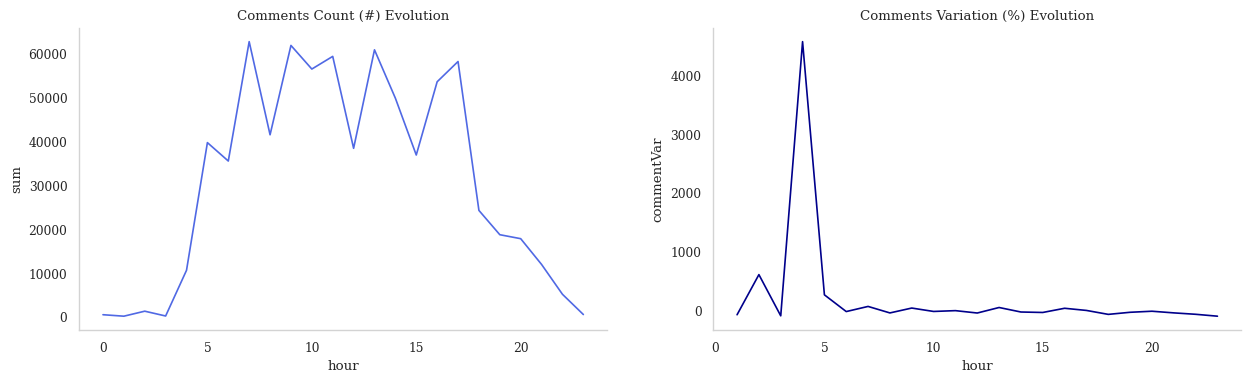

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))

sns.lineplot(  x= var_hour_comm['hour'], y=var_hour_comm['sum'], color='#5069e4',ax=axs[0])


sns.lineplot(  x= var_hour_comm['hour'], y=var_hour_comm['commentVar'], color='darkblue',ax=axs[1])

 


axs[0].set_title("Comments Count (#) Evolution")
axs[1].set_title("Comments Variation (%) Evolution")
 
axs[0].spines['left'].set_color('lightgray')
axs[0].spines['bottom'].set_color('lightgray')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('lightgray')
axs[1].spines['bottom'].set_color('lightgray')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)


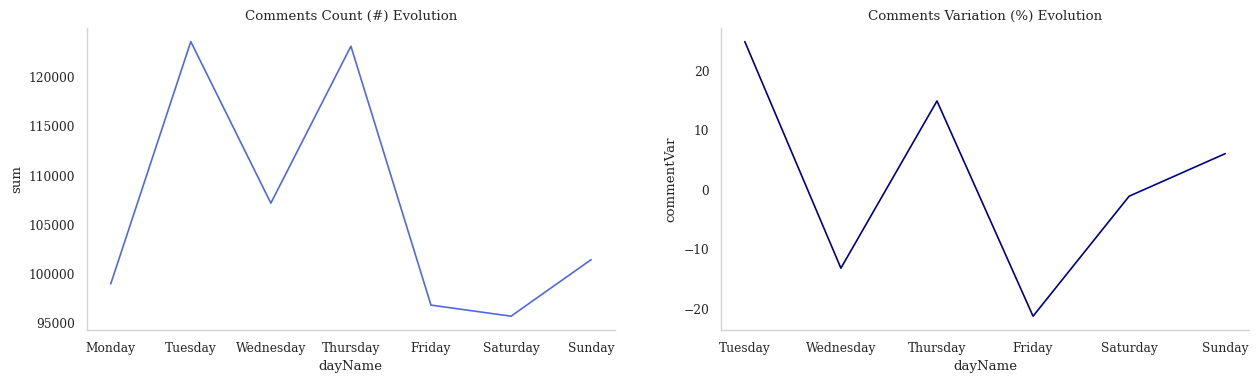

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))

sns.lineplot(  x= var_day_comm['dayName'], y=var_day_comm['sum'], color='#5069e4',ax=axs[0])
sns.lineplot(  x= var_day_comm['dayName'], y=var_day_comm['commentVar'], color='darkblue',ax=axs[1])

axs[0].set_title("Comments Count (#) Evolution")
axs[1].set_title("Comments Variation (%) Evolution")
 
axs[0].spines['left'].set_color('lightgray')
axs[0].spines['bottom'].set_color('lightgray')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('lightgray')
axs[1].spines['bottom'].set_color('lightgray')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)


In [ ]:
var_hour_comm['sum'] = var_hour_comm['sum']/1000
var_day_comm['sum'] = var_day_comm['sum']/1000

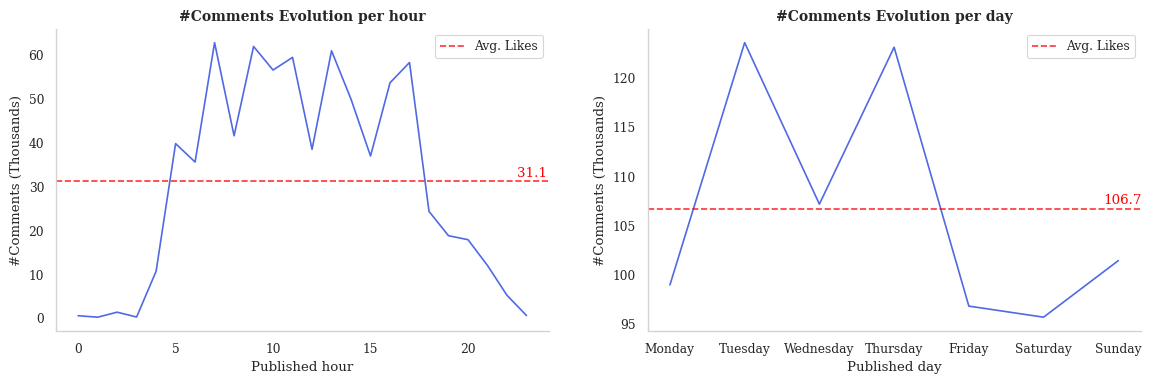

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(14,4))



sns.lineplot(  x= var_hour_comm['hour'], y=var_hour_comm['sum'], color='#5069e4',ax=axs[0])


sns.lineplot(  x= var_day_comm['dayName'], y=var_day_comm['sum'], color='#5069e4',ax=axs[1])
y_mean_0 = var_hour_comm['sum'].mean()
y_mean_1 = var_day_comm['sum'].mean()


axs[0].axhline(y=y_mean_0, color='red', linestyle='--', alpha=0.8,label= 'Avg. Likes')
axs[1].axhline(y=y_mean_1, color='red', linestyle='--', alpha=0.8,label= 'Avg. Likes')

axs[0].text(22.5,y_mean_0+1,round(y_mean_0,1),color='red')
axs[1].text(5.8,y_mean_1+0.5,round(y_mean_1,1),color='red')

axs[0].legend()
axs[1].legend()

axs[0].set_title("#Comments Evolution per hour",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
axs[1].set_title("#Comments Evolution per day",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
 
axs[0].spines['left'].set_color('lightgray')
axs[0].spines['bottom'].set_color('lightgray')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[1].spines['left'].set_color('lightgray')
axs[1].spines['bottom'].set_color('lightgray')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[1].set_xlabel('Published day') 
axs[0].set_xlabel('Published hour') 

axs[0].set_ylabel('#Comments (Thousands)') 
axs[1].set_ylabel('#Comments (Thousands)') 

plt.show()

In [ ]:
figure = px.scatter(data_frame = df, x="viewCount",
                    y="likeCount", size="likeCount", trendline="ols", 
                    title = "Relationship Between Likes and Views")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="likeCount",
                    y="commentCount", size="commentCount", trendline="ols", 
                    title = "Relationship Between Comments and Likes")
figure.show()

In [ ]:
df.head(2)

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,hour,minute,weekday,monthName,dayName,nfollowers,eng_rate,eng_level,hashtag,num_hashtags
0,https://www.instagram.com/p/Cgr-hv8Oavg/,"BORSCHT {GLUTEN-FREE, DAIRY-FREE & FAT-FREE OP...",167,11182.00,2022-07-31 12:43:48-04:00,False,Photo,"Photo shared by Medical Medium® on July 31, 20...",https://www.instagram.com/medicalmedium,influencer_3,...,12,43,6,July,Sunday,4081355,0.28,failure,[medicalmedium],1
1,https://www.instagram.com/p/CgrcQIIuNwz/,Repost from @loveinhealing\n•\nYou CAN heal yo...,310,16947.00,2022-07-31 07:44:47-04:00,False,Video,NaN,https://www.instagram.com/medicalmedium,influencer_3,...,7,44,6,July,Sunday,4081355,0.42,failure,[medicalmedium],1


### Data Explortion - Engagement focus

In [ ]:
df.describe()

,commentCount,likeCount,postId,viewCount,ad,engtrigger,Segment,WC,Analytic,Clout,...,Apostro,OtherP,day,month,hour,minute,weekday,nfollowers,eng_rate,num_hashtags
count,2658.00,2658.00,2658.00,749.00,2658.00,2658.00,2658.00,2658.00,2658.00,2658.00,...,2658.00,2658.00,2658.00,2658.00,2658.00,2658.00,2658.00,2658.00,2658.00,2658.00
mean,280.91,15605.88,1067923908944853073920.00,230328.64,0.21,0.35,1.00,122.15,66.38,61.01,...,1.75,8.36,15.75,4.95,10.86,23.06,2.94,1862679.02,0.86,1.81
std,432.63,23424.63,54911327825193506701312.00,339117.99,0.41,0.48,0.00,107.21,26.22,29.73,...,2.44,13.16,8.77,1.42,4.35,19.91,1.98,1650727.62,0.72,4.33
min,0.00,80.00,2780000000000000000.00,1766.00,0.00,0.00,1.00,1.00,1.00,1.00,...,0.00,0.00,1.00,3.00,0.00,0.00,0.00,149273.00,0.04,0.00
25%,72.25,2620.25,2810000000000000000.00,40592.00,0.00,0.00,1.00,35.00,51.04,40.06,...,0.00,2.92,8.00,4.00,7.00,4.00,1.00,862101.00,0.30,0.00
50%,150.00,9373.50,2840000000000000000.00,123029.00,0.00,0.00,1.00,90.00,73.47,62.50,...,1.09,5.13,16.00,5.00,10.00,20.00,3.00,1100022.00,0.63,0.00
75%,296.00,16343.75,2866334631535545344.00,249372.00,0.00,1.00,1.00,183.00,87.02,89.98,...,2.44,9.09,23.00,6.00,14.00,41.00,5.00,2114680.00,1.29,1.00
max,6023.00,176590.00,2830999999999999809159168.00,2546067.00,1.00,1.00,1.00,412.00,99.00,99.00,...,33.33,222.22,31.00,7.00,23.00,59.00,6.00,5400231.00,3.47,32.00


In [ ]:
df_hour = df.groupby(['hour'], as_index=False)['eng_rate'].agg(['mean', 'count']).reset_index()

In [ ]:
df_weekday = df.groupby(['dayName'], as_index=False)['eng_rate'].agg(['mean', 'count']).reset_index()

In [ ]:
df_hour.head(5)

,hour,mean,count
0,0,0.67,1
1,1,0.19,2
2,2,0.64,4
3,3,0.45,1
4,4,1.34,50


Text(0.5, 1.0, 'Engagement Level by hour')

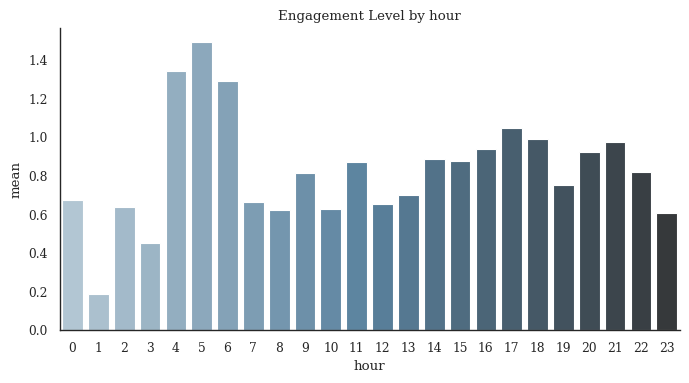

In [ ]:

plt.figure(figsize=(8,4))
sns.barplot(df_hour['hour'], y= df_hour['mean'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)
plt.title("Engagement Level by hour")


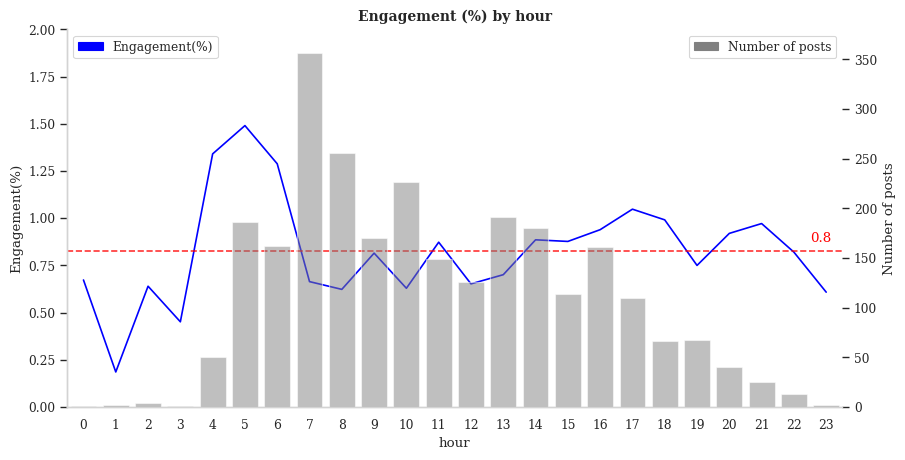

In [ ]:
import matplotlib.patches as mpatches
# plot line graph on axis #1
plt.figure(figsize=(10,5))
ax1 = sns.lineplot(
    x=df_hour['hour'], 
    y=df_hour['mean'],
    color='blue'
)
ax1.set_ylabel('Engagement(%)')
ax1.set_ylim(0, 2)
ax1_patch = mpatches.Patch(color='blue', label='Engagement(%)')
ax1.legend(handles=[ax1_patch], loc="upper left")

y_mean = df_hour['mean'].mean()
plt.axhline(y=y_mean, color='red', linestyle='--', alpha=0.8,label= 'Avg. Engagement(%)')

ax1.text(22.5,y_mean+0.05,round(y_mean,1),color='red')


# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.barplot(
    x=df_hour['hour'], 
    y=df_hour['count'],   
    color='gray', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Number of posts')
ax2.set_ylim(0, 380)
ax2_patch = mpatches.Patch(color='gray', label='Number of posts')
ax2.legend(handles=[ax2_patch], loc="upper right")


#ax2.legend()


plt.title("Engagement (%) by hour",fontdict= { 'fontsize': 10, 'fontweight':'bold'})


ax2.spines['left'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.show()


In [ ]:
df_weekday.head(20)

,dayName,mean,count
0,Monday,0.81,372
1,Tuesday,0.85,404
2,Wednesday,0.86,399
3,Thursday,0.87,397
4,Friday,0.86,380
5,Saturday,0.92,342
6,Sunday,0.89,364


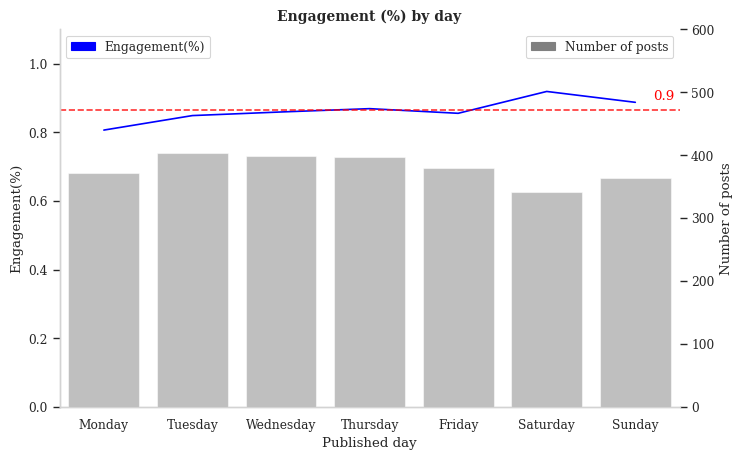

In [ ]:
# plot line graph on axis #1
plt.figure(figsize=(8,5))
ax1 = sns.lineplot(
    x=df_weekday['dayName'], 
    y=df_weekday['mean'],
    color='blue'
)
ax1.set_ylabel('Engagement(%)')
ax1.set_ylim(0, 1.1)
ax1_patch = mpatches.Patch(color='blue', label='Engagement(%)')
ax1.legend(handles=[ax1_patch], loc="upper left")

y_mean = df_weekday['mean'].mean()
plt.axhline(y=y_mean, color='red', linestyle='--', alpha=0.8,label= 'Avg. Engagement(%)')
ax1.text(6.2,y_mean+0.03,round(y_mean,1),color='red')


# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.barplot(
    x=df_weekday['dayName'], 
    y=df_weekday['count'],   
    color='gray', 
    alpha=0.5,
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Number of posts')
ax2.set_ylim(0, 600)
ax2_patch = mpatches.Patch(color='gray', label='Number of posts')
 
ax2.legend(handles=[ax2_patch], loc="upper right")




plt.title("Engagement (%) by day",fontdict= { 'fontsize': 10, 'fontweight':'bold'})


ax2.spines['left'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_xlabel('Published day') 

 

plt.show()

In [ ]:
cross_tab = pd.crosstab(index=df['monthName'],
                        columns=df['eng_level'])
cross_tab.head(2)

eng_level,failure,success
monthName,,
March,299,278
April,268,245


In [ ]:
cross_tab_prop = pd.crosstab(index=df['monthName'],
                        columns=df['eng_level'],
                         normalize="index")

cross_tab_prop.head(2)

eng_level,failure,success
monthName,,
March,0.52,0.48
April,0.52,0.48


In [ ]:
cross_tab_prop_s= cross_tab_prop [["success"]]

In [ ]:
import matplotlib.colors as colors
cmap = colors.ListedColormap(['lightgray','#5069e4'])
boundaries = [-1, -0.9, -0.6, -0.3, 0, 0.3, 0.6, 1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

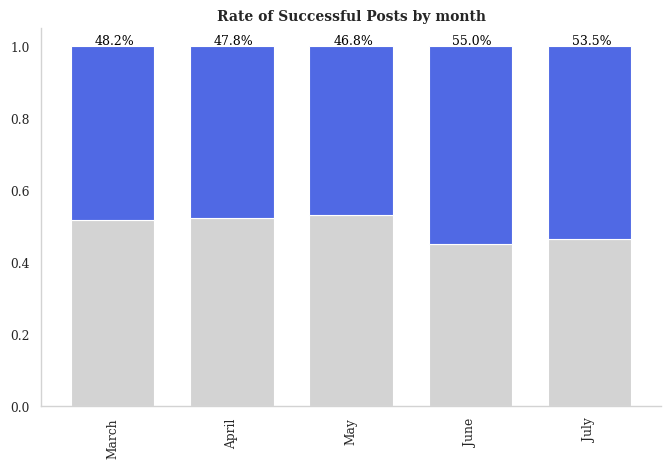

In [ ]:
ax1= cross_tab_prop.plot(kind='bar',
                    width = 0.7, 
                    stacked=True, 
                    colormap=cmap, 
                    figsize=(8, 5),
                    legend=None)


#plt.legend(loc="lower left", ncol=2)
#plt.figure(figsize=(8,5))
plt.xlabel("")
plt.ylabel("")
plt.title("Rate of Successful Posts by month",fontdict= { 'fontsize': 10, 'fontweight':'bold'})

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_s.loc[x],
                                   cross_tab_prop_s.loc[x].cumsum()):
                
        plt.text(x=n - 0.15,
                 y=1+0.006,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=9 )

 
plt.grid(False)
ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.show()

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [ ]:
df.head(2)

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,hour,minute,weekday,monthName,dayName,nfollowers,eng_rate,eng_level,hashtag,num_hashtags
0,https://www.instagram.com/p/Cgr-hv8Oavg/,"BORSCHT {GLUTEN-FREE, DAIRY-FREE & FAT-FREE OP...",167,11182.00,2022-07-31 12:43:48-04:00,False,Photo,"Photo shared by Medical Medium® on July 31, 20...",https://www.instagram.com/medicalmedium,influencer_3,...,12,43,6,July,Sunday,4081355,0.28,failure,[medicalmedium],1
1,https://www.instagram.com/p/CgrcQIIuNwz/,Repost from @loveinhealing\n•\nYou CAN heal yo...,310,16947.00,2022-07-31 07:44:47-04:00,False,Video,NaN,https://www.instagram.com/medicalmedium,influencer_3,...,7,44,6,July,Sunday,4081355,0.42,failure,[medicalmedium],1


In [ ]:
df.dtypes

postUrl                                   object
description                               object
commentCount                               int64
likeCount                                float64
pubDate         datetime64[ns, America/New_York]
                              ...               
nfollowers                                 int64
eng_rate                                 float64
eng_level                                 object
hashtag                                   object
num_hashtags                               int64
Length: 150, dtype: object

In [ ]:
df['general_topic'].value_counts()

nutrition         1008
mental_health      697
general_health     570
other              279
environmental       51
inmunology          45
cancer               8
Name: general_topic, dtype: int64

In [ ]:
df_topic = df.groupby(['general_topic'], as_index=False)['eng_rate'].agg(['mean', 'count']).reset_index()

In [ ]:
df_topic.head(10)

,general_topic,mean,count
0,cancer,0.82,8
1,environmental,0.42,51
2,general_health,0.93,570
3,inmunology,0.66,45
4,mental_health,1.00,697
5,nutrition,0.71,1008
6,other,1.04,279


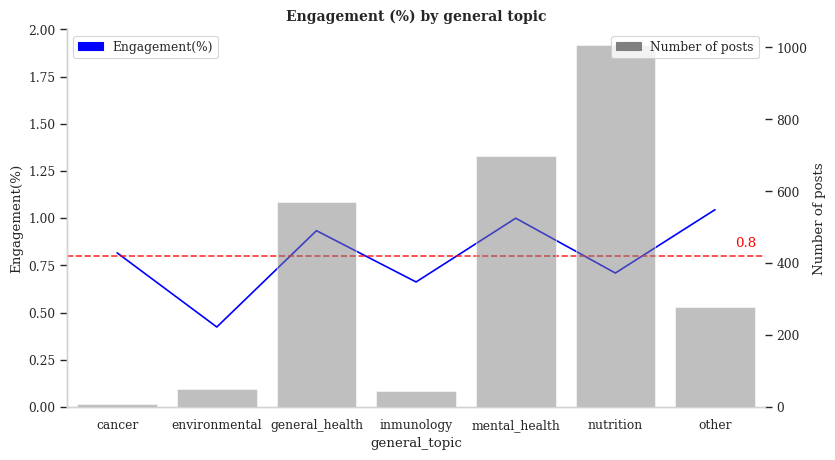

In [ ]:
import matplotlib.patches as mpatches
# plot line graph on axis #1
plt.figure(figsize=(9,5))
ax1 = sns.lineplot(
    x=df_topic['general_topic'], 
    y=df_topic['mean'],
    color='blue'
)
ax1.set_ylabel('Engagement(%)')
ax1.set_ylim(0, 2)
ax1_patch = mpatches.Patch(color='blue', label='Engagement(%)')
ax1.legend(handles=[ax1_patch], loc="upper left")

#for tick in ax1.get_xticklabels():
#    tick.set_rotation(45)
#ax1.tick_params(labelrotation=45)

y_mean = df_topic['mean'].mean()
plt.axhline(y=y_mean, color='red', linestyle='--', alpha=0.8,label= 'Avg. Engagement(%)')

ax1.text(6.2,y_mean+0.05,round(y_mean,1),color='red')


# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.barplot(
    x=df_topic['general_topic'], 
    y=df_topic['count'],   
    color='gray', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Number of posts')
ax2.set_ylim(0, 1050)
ax2_patch = mpatches.Patch(color='gray', label='Number of posts')
ax2.legend(handles=[ax2_patch], loc="upper right")


#ax2.legend()


plt.title("Engagement (%) by general topic",fontdict= { 'fontsize': 10, 'fontweight':'bold'})


ax2.spines['left'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.show()


In [ ]:
df_structure = df.groupby(['post_structure'], as_index=False)['eng_rate'].agg(['mean', 'count']).reset_index()

In [ ]:
df_structure.head(20)

,post_structure,mean,count
0,diagram_with_text_only,0.51,16
1,facsheet_without_graphics,1.25,299
2,header,0.68,1015
3,infographic,0.66,146
4,long_information_text,1.12,299
5,no_informational_post,0.83,383
6,other,0.33,179
7,short_information_text,1.29,321


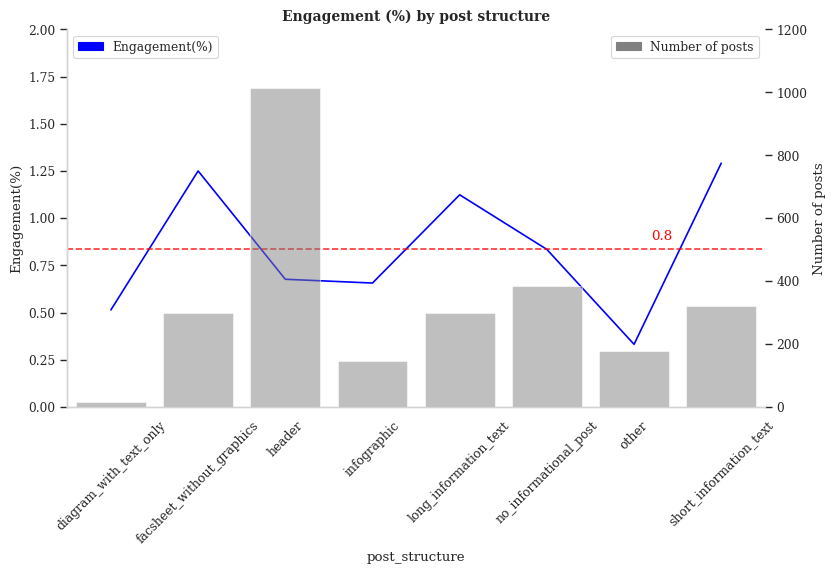

In [ ]:
import matplotlib.patches as mpatches
# plot line graph on axis #1
plt.figure(figsize=(9,5))
ax1 = sns.lineplot(
    x=df_structure['post_structure'], 
    y=df_structure['mean'],
    color='blue'
)
ax1.set_ylabel('Engagement(%)')
ax1.set_ylim(0, 2)
ax1_patch = mpatches.Patch(color='blue', label='Engagement(%)')
ax1.legend(handles=[ax1_patch], loc="upper left")

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
#ax1.tick_params(labelrotation=45)

y_mean = df_structure['mean'].mean()
plt.axhline(y=y_mean, color='red', linestyle='--', alpha=0.8,label= 'Avg. Engagement(%)')

ax1.text(6.2,y_mean+0.05,round(y_mean,1),color='red')


# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.barplot(
    x=df_structure['post_structure'], 
    y=df_structure['count'],   
    color='gray', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Number of posts')
ax2.set_ylim(0, 1200)
ax2_patch = mpatches.Patch(color='gray', label='Number of posts')
ax2.legend(handles=[ax2_patch], loc="upper right")


#ax2.legend()


plt.title("Engagement (%) by post structure",fontdict= { 'fontsize': 10, 'fontweight':'bold'})


ax2.spines['left'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.show()

In [ ]:
df_user = df.groupby(['username'], as_index=False)['eng_rate','nfollowers','likeCount','commentCount'].agg({'eng_rate':'mean','nfollowers':'mean','likeCount':'mean','commentCount':'mean'}).reset_index()

#df_user.columns =df_user.columns.droplevel(1)


In [ ]:
df_user.head(10)

,index,username,eng_rate,nfollowers,likeCount,commentCount
0,0,influencer_1,0.67,2114680.00,13930.21,269.23
1,1,influencer_10,0.45,862101.00,3728.92,168.12
2,2,influencer_2,0.43,440626.00,1808.80,69.63
3,3,influencer_3,0.36,4081355.00,14378.08,277.83
4,4,influencer_4,0.27,149273.00,396.38,12.31
5,5,influencer_5,1.53,877078.00,13216.47,200.86
6,6,influencer_6,0.84,1100022.00,9040.76,244.25
7,7,influencer_7,1.46,5400231.00,77562.67,1180.06
8,8,influencer_8,1.14,358023.00,3971.70,96.12
9,9,influencer_9,0.66,192012.00,1214.88,57.66


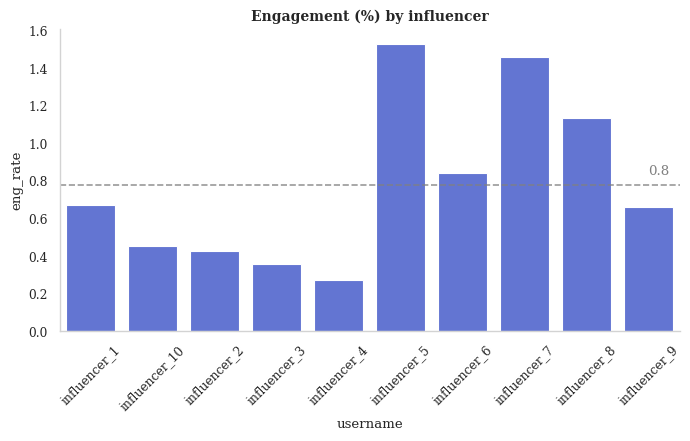

In [ ]:
plt.figure(figsize=(8,4))
ax1 = sns.barplot(
    x=df_user['username'], 
    y=df_user['eng_rate'],   
    color='#5069e4'      # Pre-existing axes for the plot
)
#sns.barplot(data=df, x="username", y="eng_rate")

y_mean = df_user['eng_rate'].mean()
plt.axhline(y=y_mean, color='gray', linestyle='--', alpha=0.8,label= 'Avg. Engagement(%)')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax1.text(9,y_mean+0.05,round(y_mean,1),color='gray')

plt.title("Engagement (%) by influencer",fontdict= { 'fontsize': 10, 'fontweight':'bold'})


ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.show()

In [ ]:
df_user['likeCount'] = df_user['likeCount']/1000

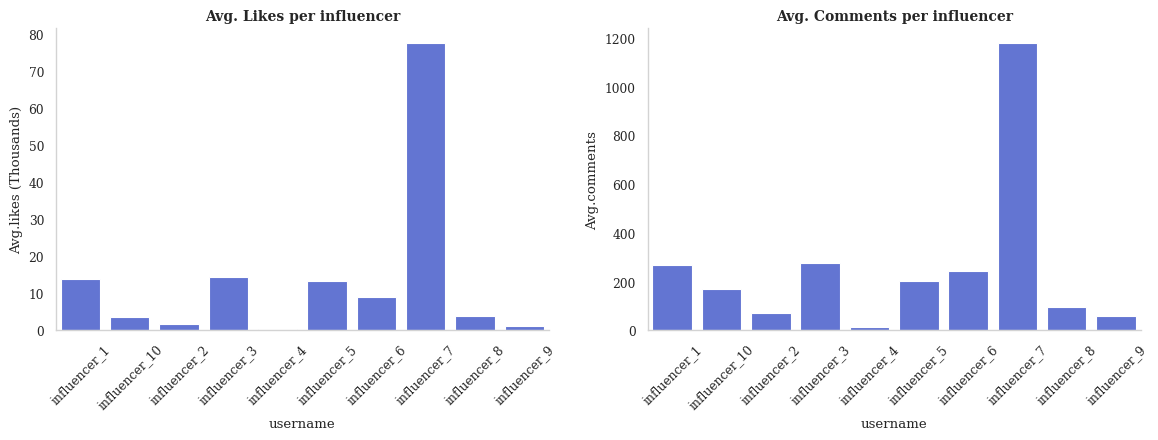

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(14,4))

ax1 = sns.barplot(
    x=df_user['username'], 
    y=df_user['likeCount'],   
    color='#5069e4',
    ax=axs[0]      # Pre-existing axes for the plot
)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2 = sns.barplot(
    x=df_user['username'], 
    y=df_user['commentCount'],   
    color='#5069e4',
    ax=axs[1]      # Pre-existing axes for the plot
)

for tick in ax2.get_xticklabels():
    tick.set_rotation(45)


ax1.set_ylabel('Avg.likes (Thousands)')

ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_title("Avg. Likes per influencer",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
ax2.set_title("Avg. Comments per influencer",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
 

ax2.set_ylabel('Avg.comments')

ax2.spines['left'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

#sns.lineplot(  x= var_hour_comm['hour'], y=var_hour_comm['sum'], color='#5069e4',ax=axs[0])


#sns.lineplot(  x= var_day_comm['dayName'], y=var_day_comm['sum'], color='#5069e4',ax=axs[1])

In [ ]:
df_post= df.groupby(['type'],as_index=False)['eng_rate'].agg({'eng_rate':'mean'}).reset_index()
#df_post= df.groupby(['isSidecar'],as_index=False)['eng_rate'].agg({'eng_rate':'mean'}).reset_index()
df_ad = df.groupby(['ad_type'],as_index=False)['eng_rate'].agg({'eng_rate':'mean'}).reset_index()
df_engtrigger = df.groupby(['engtrigger_type'],as_index=False)['eng_rate'].agg({'eng_rate':'mean'}).reset_index()

In [ ]:
df_engtrigger.head(5)

,index,engtrigger_type,eng_rate
0,0,bold_claim,2.95
1,1,connecting_with_audience,1.28
2,2,no_eng_trigger,0.86


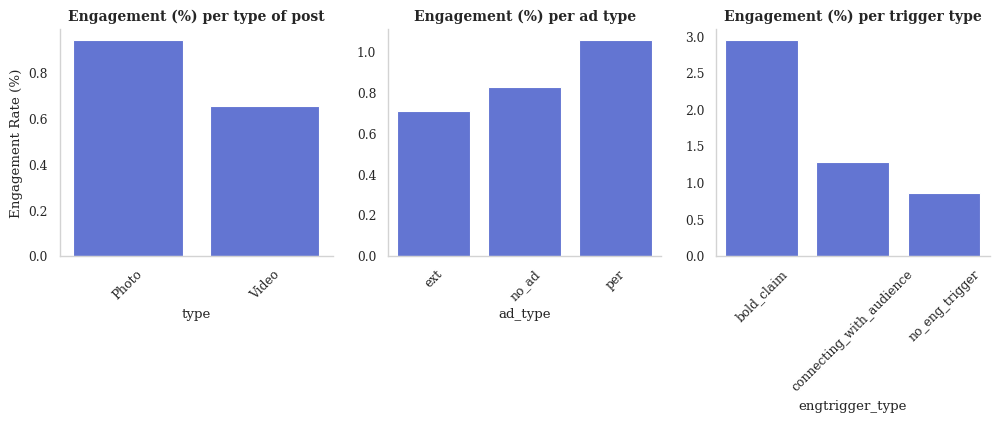

In [ ]:

fig, axs = plt.subplots(ncols=3,figsize=(12,3))

ax1 = sns.barplot(
    x=df_post['type'], 
    y=df_post['eng_rate'],   
    color='#5069e4',
    ax=axs[0]      # Pre-existing axes for the plot
)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2 = sns.barplot(
    x=df_ad['ad_type'], 
    y=df_ad['eng_rate'],   
    color='#5069e4',
    ax=axs[1]      # Pre-existing axes for the plot
)

for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

ax3 = sns.barplot(
    x=df_engtrigger['engtrigger_type'], 
    y=df_engtrigger['eng_rate'],   
    color='#5069e4',
    ax=axs[2]      # Pre-existing axes for the plot
)

for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

ax1.set_ylabel('Engagement Rate (%)')

ax1.spines['left'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_title("Engagement (%) per type of post",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
ax2.set_title("Engagement (%) per ad type",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
ax3.set_title("Engagement (%) per trigger type",fontdict= { 'fontsize': 10, 'fontweight':'bold'})
  

ax2.set_ylabel('')

ax2.spines['left'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3.set_ylabel('')

ax3.spines['left'].set_color('lightgray')
ax3.spines['bottom'].set_color('lightgray')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.show()


In [ ]:
# Prepare corpus into one giant string
train_string = " ".join(map(str,df['description'].values))
print(f"***** Extract of train_string ***** \n{train_string[:101]}", "\n")
# Split train_corpus by white space
splits = train_string.split()  

tokeniser = RegexpTokenizer("[A-Za-z]+")
tokens = tokeniser.tokenize(train_string)
print(tokens[:20], "\n")

lemmatiser = WordNetLemmatizer()
tokens_norm = [lemmatiser.lemmatize(t.lower(), "v") for t in tokens]
print(f"***** Extract of tokens_norm ***** \n{tokens_norm[:101]}", "\n")
print(f"Number of unique tokens: {len(set(tokens_norm))}")

***** Extract of train_string ***** 
BORSCHT {GLUTEN-FREE, DAIRY-FREE & FAT-FREE OPTION}
 
This delicious borscht recipe brings together t 

['BORSCHT', 'GLUTEN', 'FREE', 'DAIRY', 'FREE', 'FAT', 'FREE', 'OPTION', 'This', 'delicious', 'borscht', 'recipe', 'brings', 'together', 'the', 'sweet', 'earthiness', 'of', 'beets', 'with'] 

***** Extract of tokens_norm ***** 
['borscht', 'gluten', 'free', 'dairy', 'free', 'fat', 'free', 'option', 'this', 'delicious', 'borscht', 'recipe', 'bring', 'together', 'the', 'sweet', 'earthiness', 'of', 'beets', 'with', 'other', 'wholesome', 'and', 'nourish', 'vegetables', 'and', 'herbs', 'this', 'borscht', 'recipe', 'can', 'be', 'enjoy', 'fat', 'free', 'or', 'if', 'you', 're', 'look', 'for', 'something', 'a', 'bite', 'decadent', 'or', 'special', 'to', 'serve', 'to', 'family', 'or', 'friends', 'feel', 'free', 'to', 'serve', 'a', 'dollop', 'of', 'the', 'cashew', 'sour', 'cream', 'on', 'top', 'of', 'the', 'borscht', 'borscht', 'ingredients', 'lb', 'white', '

### Text Pre processing

In [ ]:

def convert_to_american(token):
    # Copied from here
    token = re.sub(r"(...)our$", r"\1or", token)
    token = re.sub(r"([bt])re$", r"\1er", token)
    token = re.sub(r"([iy])s(e$|ing|ation)", r"\1z\2", token)
    token = re.sub(r"ogue$", "og", token)
    return token
#def correct_typo(tokens):
#    spell = SpellChecker()
#    return [spell.correction(t) if len(spell.unknown([t]))>0 else t for t in tokens]


# Simple approach
def preprocess_text(text):
    # 1. Tokenise to alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]+')
    tokens = tokeniser.tokenize(text)
    
    # 2. Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(t.lower(), pos='v') for t in tokens]

    # 3. Correct spelling (this won't convert 100% )
    #tokens = correct_typo(tokens)
    
    # 4. Convert British spelling to American spelling (this won't convert 100%)
    #tokens = [convert_to_american(t) for t in tokens]

    # 5. Remove stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['amazon','link','bio','x'])
    tokens = [t for t in tokens if t not in stop_words]

    return ' '.join(tokens)

 


def preprocess_text_2(text):
    # 1. Tokenise to alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]+')
    tokens = tokeniser.tokenize(text)
    
    # 2. Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(t.lower(), pos='v') for t in tokens]

    # 3. Correct spelling (this won't convert 100% )
    #tokens = correct_typo(tokens)
    
    # 4. Convert British spelling to American spelling (this won't convert 100%)
    #tokens = [convert_to_american(t) for t in tokens]

    # 5. Remove stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['amazon','link','bio','x'])
    tokens = [t for t in tokens if t not in stop_words]

    return  tokens

In [ ]:
df['clean_text'] = df.description.apply(str).apply(preprocess_text)

In [ ]:
#Filtering posts which clean_text is null or just empty
df = df[df['clean_text'].notna()]
df = df[df['clean_text'].str.len() > 0]

In [ ]:
df.shape

(2652, 151)

In [ ]:
df[['description','clean_text']].head(5)

,description,clean_text
0,"BORSCHT {GLUTEN-FREE, DAIRY-FREE & FAT-FREE OP...",borscht gluten free dairy free fat free option...
1,Repost from @loveinhealing\n•\nYou CAN heal yo...,repost loveinhealing heal anxiety medical medi...
2,"BLACKBERRY POPSICLES \n \nThe deep, rich, purp...",blackberry popsicles deep rich purple black co...
3,"Repost from @blueskyesplanet\n\nIn early life,...",repost blueskyesplanet early life multiple con...
4,RADIATION \n\nIn Medical Medium Cleanse to Hea...,radiation medical medium cleanse heal share tr...


In [ ]:
df_success = df[df["eng_level"]=="success"]
df_success.shape

(1330, 151)

In [ ]:
df_failure = df[df["eng_level"]=="failure"]
df_failure.shape

(1322, 151)

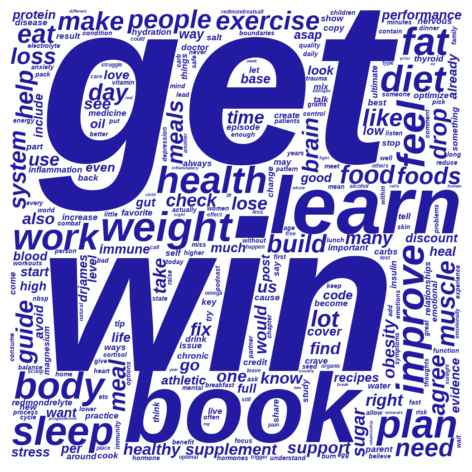

In [ ]:
#WorldCount 

df_word = df_success.clean_text.str.split(expand=True).stack().value_counts() 
dict_df = df_word.to_dict()
#dict_final = {x:y['frecuency'] for (x,y) in dict_df.items()}

#mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

from wordcloud import WordCloud  

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(244, 72%, 37%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', 
    #background_color="white",width=2000, height=1000, max_words=500).generate(" ".join(df['clean_text'].dropna().astype(str)))
    background_color="white", width=1000, height=1000, max_words=300).generate_from_frequencies(dict_df)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
#plt.title("World Cloud - Engagement Success",fontdict= { 'fontsize': 10, 'fontweight':'bold'})

plt.figure(figsize=[10,6])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('biden_wc.png')

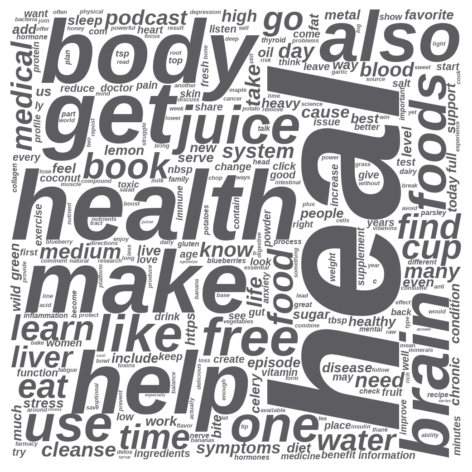

In [ ]:
#WorldCount 

df_word = df_failure.clean_text.str.split(expand=True).stack().value_counts() 
dict_df = df_word.to_dict()
#dict_final = {x:y['frecuency'] for (x,y) in dict_df.items()}

#mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

from wordcloud import WordCloud  

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(244, 2%, 37%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', 
    #background_color="white",width=2000, height=1000, max_words=500).generate(" ".join(df['clean_text'].dropna().astype(str)))
    background_color="white", width=1000, height=1000, max_words=300).generate_from_frequencies(dict_df)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[10,6])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('biden_wc.png')

In [ ]:
pos_documents = [preprocess_text_2(document) for document in df.loc[df['eng_level']=="success", 'clean_text']]
pos_tokens = [item for sublist in pos_documents for item in sublist]
pos_freq = FreqDist(pos_tokens)
pos_common = [word for word, frequency in pos_freq.most_common(20)]
print(f"***** 20 frequent tokens in success state: *****\n{pos_common}\n")
neg_documents = [preprocess_text_2(document) for document in df.loc[df['eng_level']=="failure", 'clean_text']]
neg_tokens = [item for sublist in neg_documents for item in sublist]
neg_freq = FreqDist(neg_tokens)
neg_common = [word for word, frequency in neg_freq.most_common(20)]
print(f"***** 20 frequent tokens in failure state: *****\n{neg_common}\n")
common = set(neg_common).union(pos_common)
print(f"***** Their union: *****\n{common}\n")

***** 20 frequent tokens in success state: *****
['get', 'win', 'book', 'learn', 'weight', 'sleep', 'plan', 'feel', 'improve', 'fat', 'body', 'health', 'work', 'diet', 'people', 'eat', 'exercise', 'make', 'food', 'need']

***** 20 frequent tokens in failure state: *****
['heal', 'health', 'body', 'make', 'help', 'get', 'also', 'brain', 'juice', 'free', 'like', 'use', 'foods', 'one', 'book', 'food', 'learn', 'find', 'time', 'eat']

***** Their union: *****
{'use', 'learn', 'also', 'feel', 'people', 'work', 'diet', 'exercise', 'body', 'juice', 'get', 'need', 'time', 'sleep', 'fat', 'like', 'heal', 'book', 'foods', 'help', 'eat', 'plan', 'find', 'improve', 'free', 'make', 'health', 'win', 'one', 'weight', 'brain', 'food'}



In [ ]:
# Create a dataframe containing the common tokens and their frequency
common_freq = pd.DataFrame(index=common, columns=["failure", "success"])
for token in common:
    common_freq.loc[token, "success"] = pos_freq[token]
    common_freq.loc[token, "failure"] = neg_freq[token]
common_freq.sort_values(by="success", inplace=True)
# Add ranks and rank difference
common_freq['succ_rank'] = common_freq['success'].rank()
common_freq['fail_rank'] = common_freq['failure'].rank()
common_freq['rank_diff'] = common_freq['fail_rank'] - common_freq['succ_rank']
common_freq.sort_values(by='rank_diff', inplace=True)
common_freq.head(10)

,failure,success,succ_rank,fail_rank,rank_diff
win,86,668,31.00,1.00,-30.00
weight,136,463,28.00,4.00,-24.00
plan,106,426,26.00,2.00,-24.00
sleep,219,434,27.00,6.00,-21.00
improve,134,412,24.00,3.00,-21.00
feel,238,418,25.00,8.50,-16.50
fat,238,409,23.00,8.50,-14.50
learn,372,482,29.00,16.00,-13.00
book,394,584,30.00,18.00,-12.00
diet,234,371,19.00,7.00,-12.00


In [ ]:
common_freq.index

Index(['win', 'weight', 'plan', 'sleep', 'improve', 'feel', 'fat', 'learn',
       'book', 'diet', 'exercise', 'work', 'people', 'get', 'eat', 'need',
       'food', 'time', 'body', 'like', 'find', 'foods', 'health', 'one',
       'make', 'use', 'brain', 'help', 'free', 'also', 'juice', 'heal'],
      dtype='object')

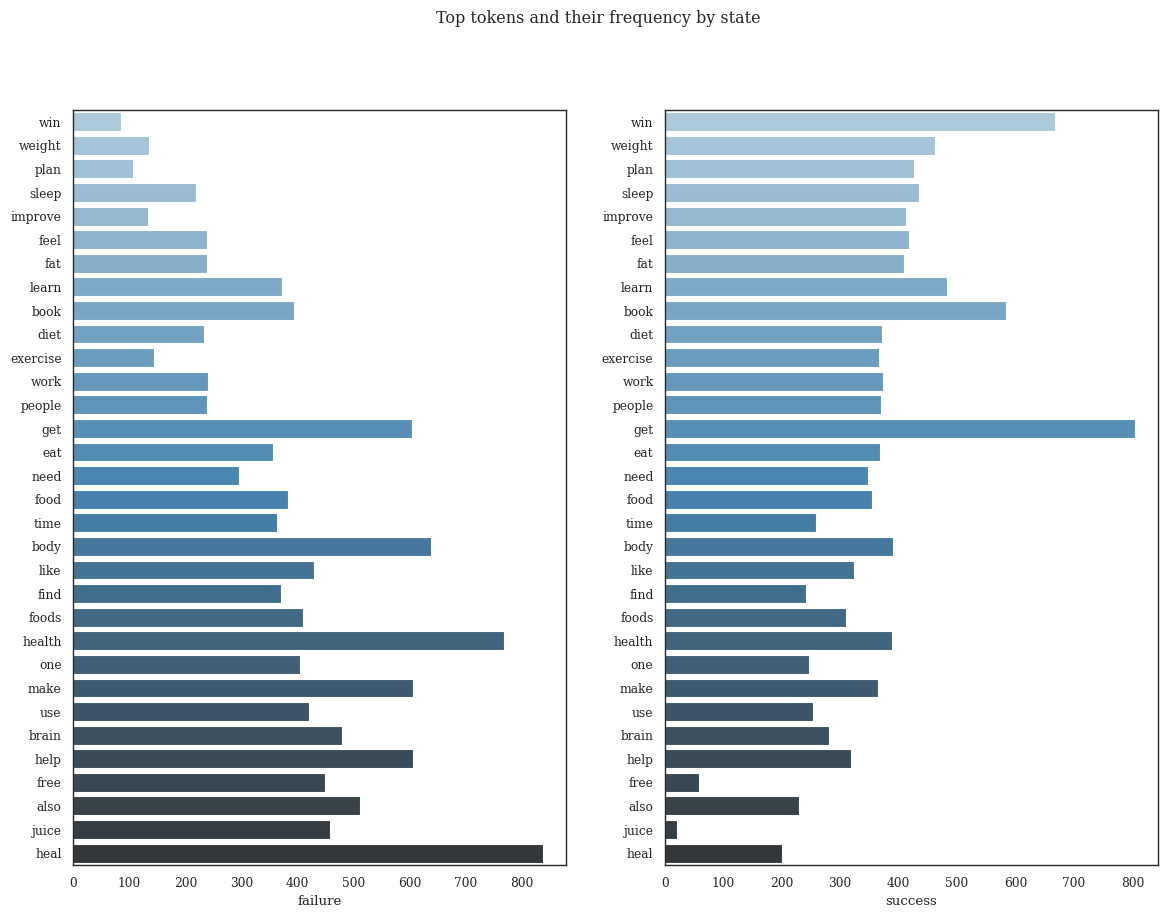

In [ ]:
fig, ax =plt.subplots(1, 2, figsize=(14, 10))
sns.barplot(x="failure", y=common_freq.index, data = common_freq, ax=ax[0],palette="Blues_d")
sns.barplot(x="success", y=common_freq.index, data = common_freq, ax=ax[1],palette="Blues_d")
fig.suptitle('Top tokens and their frequency by state');

In [ ]:
def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [preprocess_text_2(document) for document in corpus]
    #documents_2 = [item for item in documents if len(item) > 0 ] 

    # Find ngrams per document
    n_grams = [list(ngrams(document, ngram)) for document in documents if document ]
     
    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])

In [ ]:
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

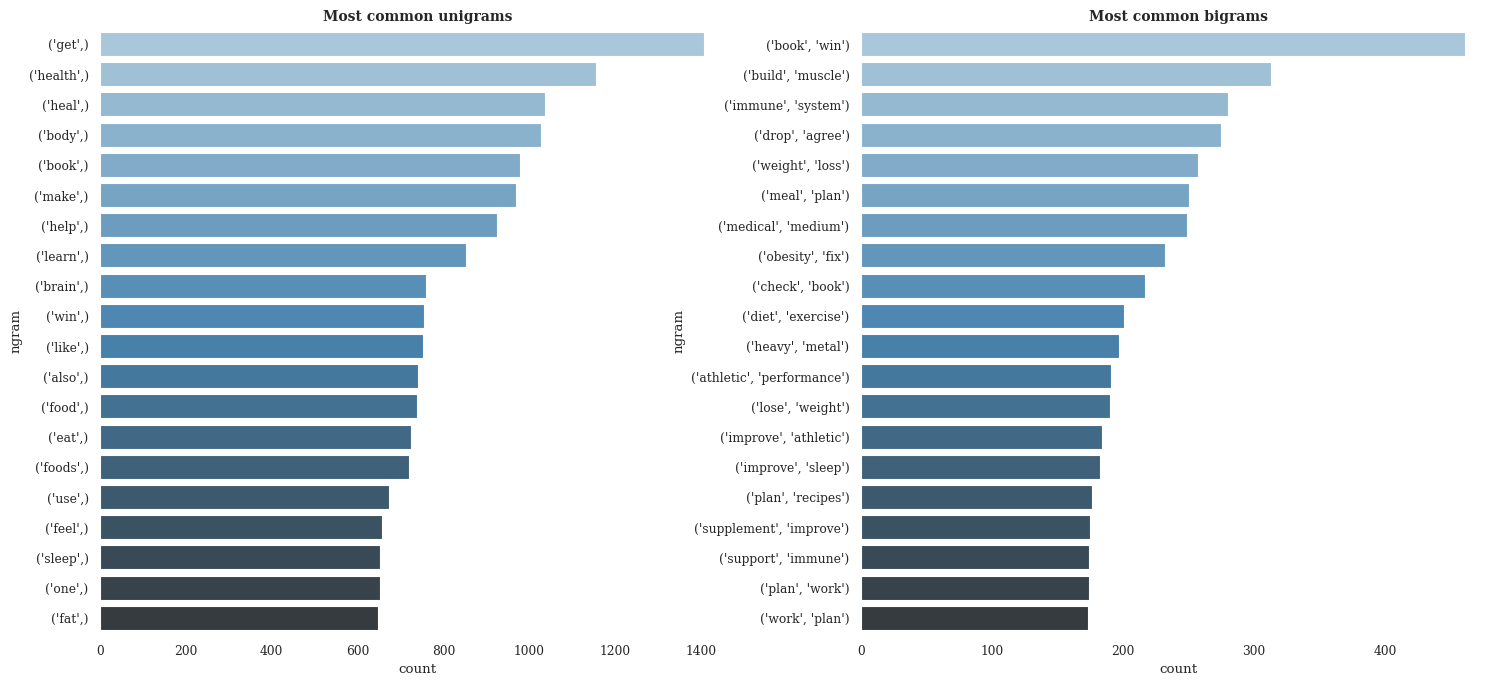

In [ ]:
# Get frequent ngrams for all 4
fig, ax =plt.subplots(1, 2, figsize=(18, 8))

for i in range(1,3):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    #plt.figure(figsize=(10,6))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(df['clean_text'], i),palette=("Blues_d"),ax=ax[i-1])
    ax[i-1].spines['left'].set_visible(False)
    ax[i-1].spines['bottom'].set_visible(False)
    ax[i-1].spines['right'].set_visible(False)
    ax[i-1].spines['top'].set_visible(False)
    
    ax[i-1].set_title(f"Most common {mapping[i]}grams",fontdict= { 'fontsize': 10, 'fontweight':'bold'}) 

    #plt.xlabel(f"word count")
    #plt.ylabel(f"{mapping[i]}grams")
    #plt.title(f"Most common {mapping[i]}grams",fontdict= { 'fontsize': 10, 'fontweight':'bold'});

## Feature Engineering 


In this section, we focus on the following tasks: 


*   Adding features derived from the post description 
*   Adding features from lexicons
*   Adding features from transfer learning NN network



### Text Features

In [ ]:
def syllable_count(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [ ]:
#encoding our target variable 
df['target'] = df.eng_level.map({'success':1, 'failure':0})

In [ ]:
#Adding some features from text

stop_words = stopwords.words("english")

df["n_sentences"] = df["description"].apply(str).apply(sent_tokenize).apply(len)
df["tokens"] = df["description"].apply(str).apply(tokeniser.tokenize)
df["n_tokens"] = df["tokens"].apply(len)
df["n_characters"] = df["description"].apply(str).apply(len)
df["n_stopwords"] = df["tokens"].apply(lambda tokens: len([t for t in tokens if t in stop_words]))
df["p_stopwords"] = df["n_stopwords"]/df["n_tokens"]

In [ ]:
df["syllable_count"]   = df["description"].apply(str).apply(lambda x: syllable_count(x))

df["is_weekend"]       = df["weekday"].apply(lambda x: 1 if x > 4 else 0)

In [ ]:
#import nltk
#nltk.download('averaged_perceptron_tagger')

#def get_pos(string):
#    string = nltk.word_tokenize(string)
#    pos_string = nltk.pos_tag(string)
#    return pos_string 

#df['token'] = df.apply(lambda row: nltk.word_tokenize(row['STORY']), axis=1)
#df['pos_tag'] = df.text.apply(get_pos)
#tag_count_df = pd.DataFrame(df['pos_tags'].map(lambda x: Counter(tag[1] for tag in x)).to_list())

#pd.concat([df, tag_count_df], axis=1).fillna(0).drop(['pos_tags', 'token'], axis=1)

In [ ]:
#import nltk
#nltk.download('stopwords') 
#nltk.download('wordnet')
#nltk.download('vader_lexicon')

### Lexicon: VADER 

In [ ]:
df = shuffle(df)

In [ ]:
sid = SentimentIntensityAnalyzer()

df[['lb_vader_neg', 'lb_vader_neu', 'lb_vader_pos', 'lb_vader_compound']] = df['description'].apply(str).apply(sid.polarity_scores).apply(pd.Series)
df.head(2)

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,n_tokens,n_characters,n_stopwords,p_stopwords,syllable_count,is_weekend,lb_vader_neg,lb_vader_neu,lb_vader_pos,lb_vader_compound
1430,https://www.instagram.com/p/CcRFj1OFH8d/,The first step is identifying where we want to...,96,9837.00,2022-04-12 16:00:13-04:00,False,Photo,NaN,https://www.instagram.com/drmarkhyman,influencer_1,...,237,1289,105,0.44,375,0,0.01,0.77,0.22,0.99
4145,https://www.instagram.com/p/Cc9OuK1ungI/,sometimes wellness looks like this.\n⠀\n⠀\n\n ...,34,2542.00,2022-04-29 19:26:49-04:00,False,Photo,NaN,https://www.instagram.com/drwillcole,influencer_8,...,8,71,1,0.12,10,0,0.00,0.36,0.64,0.66


In [ ]:
df[['clean_text','lb_vader_pos']].nlargest(5, ['lb_vader_pos'])

,clean_text,lb_vader_pos
3704,happy sunday,0.79
4134,deep wellness,0.74
4115,deep wellness,0.74
1410,favorite way actively relax,0.67
4145,sometimes wellness look like,0.64


In [ ]:
df[['clean_text','lb_vader_neg']].nlargest(5, ['lb_vader_neg'])

,clean_text,lb_vader_neg
2426,damn,0.75
3693,overcome worst fear www amenclinics com,0.70
318,body pain back pain sciatica,0.69
3823,new solutions mass violence crisis,0.64
3838,stop madness simple answer win cut,0.59


### Lexicon: AFINN 

In [ ]:
 
afinn = Afinn()
#df['lb_afinn']= afinn.score(df['text'])

df[['lb_afinn']] = df['description'].apply(str).apply(afinn.score).apply(pd.Series)

In [ ]:
df[['clean_text','lb_afinn']].head(5)

,clean_text,lb_afinn
1430,first step identify want age since plan live p...,35.00
4145,sometimes wellness look like,2.00
3299,look ultimate guide weight loss check book obe...,-11.00
258,repost mommy take nicholas dentist first time ...,20.00
3758,start monday one world unique outlook life ski...,5.00


### Lexicon: Texblob 

In [ ]:

df[['lb_blob_polarity', 'lb_blob_subjectivity']] = df['description'].apply(str).apply(lambda x:TextBlob(x).sentiment).to_list()
 

In [ ]:
columns = ['clean_text', 'target', 'lb_blob_polarity', 'lb_blob_subjectivity']
df[columns].nlargest(5, ['lb_blob_polarity'])

,clean_text,target,lb_blob_polarity,lb_blob_subjectivity
2231,howtomeetyourself drop pre sale perfect cocoon...,1,1.00,1.00
3760,great night ballpark market team,0,1.00,0.75
4052,strive best instead best strive best version o...,0,1.00,0.30
970,research find fish contain toxins may pose ris...,0,1.00,0.30
3735,lessons best relationship ever,0,1.00,0.30


Corrplot to evaluate any linear relationship between our target and the lexicons

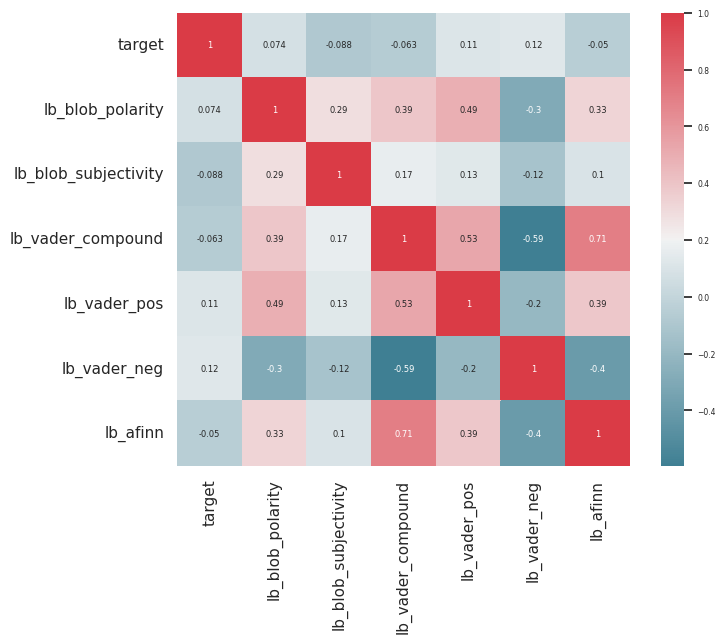

In [ ]:
from matplotlib import pyplot as pl

columns = ['clean_text', 'target', 'lb_blob_polarity', 'lb_blob_subjectivity','lb_vader_compound',
           'lb_vader_pos','lb_vader_neg', 'lb_afinn']

f, ax = pl.subplots(figsize=(8, 6))
corr = df[columns].corr()

sns.set(font_scale=0.5)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

### SieBERT (Roberta) Transformers - Hugging Face


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.3 MB/s 
     |████████████████████████████████| 6.6 MB 49.3 MB/s 
     |████████████████████████████████| 120 kB 73.5 MB/s 


In [ ]:
# Import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
# Load tokenizer and model, create trainer
model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

In [ ]:
# Example: Import data from csv-file stored on Google Drive

#df_huggface = df.sample(n=3000)

pred_texts = df['clean_text'].dropna().astype('str').tolist()

state = df['target'].dropna().astype('str').tolist()

In [ ]:
# Tokenize texts and create prediction data set
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [ ]:
len(pred_texts)

2658

In [ ]:
# Run predictions
predictions = trainer.predict(pred_dataset)

***** Running Prediction *****
  Num examples = 2658
  Batch size = 8


In [ ]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
len(scores)

2658

In [ ]:
df[['lb_rberta_pred', 'lb_rberta_label', 'lb_rberta_score']] = list(zip(preds,labels,scores))

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
#df_new = pd.DataFrame(list(zip(state,pred_texts,preds,labels,scores)), columns=['state','text','pred','label','score'])
df.head(5)

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,lb_vader_neg,lb_vader_neu,lb_vader_pos,lb_vader_compound,lb_afinn,lb_blob_polarity,lb_blob_subjectivity,lb_rberta_pred,lb_rberta_label,lb_rberta_score
1430,https://www.instagram.com/p/CcRFj1OFH8d/,The first step is identifying where we want to...,96,9837.00,2022-04-12 16:00:13-04:00,False,Photo,NaN,https://www.instagram.com/drmarkhyman,influencer_1,...,0.01,0.77,0.22,0.99,35.00,0.11,0.47,1,POSITIVE,1.00
4145,https://www.instagram.com/p/Cc9OuK1ungI/,sometimes wellness looks like this.\n⠀\n⠀\n\n ...,34,2542.00,2022-04-29 19:26:49-04:00,False,Photo,NaN,https://www.instagram.com/drwillcole,influencer_8,...,0.00,0.36,0.64,0.66,2.00,0.00,0.00,1,POSITIVE,0.95
3299,https://www.instagram.com/p/CetAPghggHG/,👉If you are looking for the ultimate guide to ...,64,12032.00,2022-06-12 05:15:14-04:00,False,Photo,NaN,https://www.instagram.com/drjamesdinic,influencer_5,...,0.15,0.81,0.04,-0.93,-11.00,0.26,0.51,1,POSITIVE,1.00
258,https://www.instagram.com/p/CdJ2p10uMRv/,Repost from @mommy\n•\nI took Nicholas to the ...,284,15558.00,2022-05-04 17:06:38-04:00,False,Photo,NaN,https://www.instagram.com/medicalmedium,influencer_3,...,0.03,0.86,0.11,0.98,20.00,0.23,0.44,1,POSITIVE,1.00
3758,https://www.instagram.com/p/CfT8HVvL6vi/,Before you start your Monday...\n\nThere is on...,183,11962.00,2022-06-27 08:09:33-04:00,False,Photo,NaN,https://www.instagram.com/doc_amen,influencer_6,...,0.00,0.90,0.10,0.74,5.00,0.38,0.66,1,POSITIVE,1.00


In [ ]:
df.shape

(2658, 170)

In [ ]:
#Downloading files with all features

from google.colab import files
df.to_csv('Instagram_Engagement_DatasetwithFeatures_vf.csv',index=False, encoding = 'utf-8-sig') 
files.download('Instagram_Engagement_DatasetwithFeatures_vf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For simplicity, this file its already saved and accessed from the following path:

In [ ]:
path = 'https://www.dropbox.com/s/roli849geyrh3uf/Instagram_Engagement_DatasetwithFeatures_vf.csv?dl=1'
#path = 'https://www.dropbox.com/s/abpq92nj0wuho7v/Instagram_Engagement_DatasetwithFeaturesv2.csv?dl=1'
#path = 'https://www.dropbox.com/s/ktq7uoqu9lsusd4/Instagram_Engagement_DatasetwithFeatures.csv?dl=1'
df = pd.read_csv(path)

In [ ]:
df.head()

,postUrl,description,commentCount,likeCount,pubDate,isSidecar,type,caption,profileUrl,username,...,lb_vader_neg,lb_vader_neu,lb_vader_pos,lb_vader_compound,lb_afinn,lb_blob_polarity,lb_blob_subjectivity,lb_rberta_pred,lb_rberta_label,lb_rberta_score
0,https://www.instagram.com/p/CcRFj1OFH8d/,The first step is identifying where we want to...,96,9837.00,2022-04-12 16:00:13-04:00,False,Photo,NaN,https://www.instagram.com/drmarkhyman,influencer_1,...,0.01,0.77,0.22,0.99,35.00,0.11,0.47,1,POSITIVE,1.00
1,https://www.instagram.com/p/Cc9OuK1ungI/,sometimes wellness looks like this.\n⠀\n⠀\n\n ...,34,2542.00,2022-04-29 19:26:49-04:00,False,Photo,NaN,https://www.instagram.com/drwillcole,influencer_8,...,0.00,0.36,0.64,0.66,2.00,0.00,0.00,1,POSITIVE,0.95
2,https://www.instagram.com/p/CetAPghggHG/,👉If you are looking for the ultimate guide to ...,64,12032.00,2022-06-12 05:15:14-04:00,False,Photo,NaN,https://www.instagram.com/drjamesdinic,influencer_5,...,0.15,0.81,0.04,-0.93,-11.00,0.26,0.51,1,POSITIVE,1.00
3,https://www.instagram.com/p/CdJ2p10uMRv/,Repost from @mommy\n•\nI took Nicholas to the ...,284,15558.00,2022-05-04 17:06:38-04:00,False,Photo,NaN,https://www.instagram.com/medicalmedium,influencer_3,...,0.03,0.86,0.11,0.98,20.00,0.23,0.44,1,POSITIVE,1.00
4,https://www.instagram.com/p/CfT8HVvL6vi/,Before you start your Monday...\n\nThere is on...,183,11962.00,2022-06-27 08:09:33-04:00,False,Photo,NaN,https://www.instagram.com/doc_amen,influencer_6,...,0.00,0.90,0.10,0.74,5.00,0.38,0.66,1,POSITIVE,1.00


In [ ]:
df.shape

(2652, 170)

## Modeling Phase

In this phase, we focus on the following tasks: 



* Features selection
* Dummy classifier
* Modeling prediction by each group of features



In [ ]:
#Modeling libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
#from utilities import plot_decision_tree
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score

In [ ]:
def evaluate_model(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train, y_train)
    print('Accuracy of classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
    print('Accuracy of classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

    

    
    label_name= ['Success','Failure']
    y_pred = clf.predict(X_test)
    print('F1 score of classifier on test set: {:.4f}'
     .format(f1_score(y_test, y_pred)))
    print('')
     
    #print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf_1.predict(X_train))))
    sns.set_style("ticks")
    plot_confusion_matrix(clf, X_test, y_test,cmap='Blues', values_format='d', labels=[1, 0],
        display_labels=label_name)

    #print('F(2)score with weight in recall: {:.3f}'.format(fbeta_score(y_test, y_pred, beta=2)))
     
    #print(precision_score(y_test, y_pred))
    #print(recall_score(y_test, y_pred))
        
    print('')
    print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred,
                                                                    labels=[1, 0],
                                                                    target_names=label_name)))

### Feature Selection

After adding features and using distinct methods to enrich our dataset, we train our final model to determine which features influence in engagement success

In [ ]:
#all columns
col = list(df.columns)
len(col)

170

In [ ]:
# Evaluating the frequency of values within a column 
# if a column has same values in more than 80% then it does not add value to the model

lendclub_columns = df.select_dtypes(include = ['object']).columns
#lendclub_columns = df.drop(['loan_status'])
   
df_frecuency = pd.DataFrame()

#Recorremos cada columna del dataset
    
for column in lendclub_columns:    
    df_category = pd.crosstab(index= df[column],  # Make a crosstab
                            columns='frecuency_per') 
    df_category = round((df_category/df_category.sum())*100,2)
    df_category['column_name']=column
    df_frecuency = pd.concat([df_category, df_frecuency], axis=0)


df_frecuency = df_frecuency[['column_name', 'frecuency_per']]
df_frecuency.sort_values('frecuency_per', ascending=False).head(10)

col_0,column_name,frecuency_per
no_eng_trigger,engtrigger_type,99.9200
POSITIVE,lb_rberta_label,88.5000
informational_post,content_type,85.3700
no_ad,ad_type,78.7300
Photo,type,71.8300
[],hashtag,59.8000
success,eng_level,56.3000
failure,eng_level,43.7000
nutrition,general_topic,37.9700
header,post_structure,35.8600


In [ ]:
#non relevant columns from origial dataset 
col_exclude = ['postUrl','description','commentCount','likeCount','pubDate',
               'caption','profileUrl','username','postId','query','viewCount','tokens',
                'monthName','dayName','eng_level','hashtag','clean_text','eng_rate',
                'lb_rberta_label','nfollowers','content_type','ad_type','ad','engtrigger_type']

In [ ]:
#Selecting LIWC columns in order to identify the most relevant ones
index_start= col.index("Segment")
#col_LIWC = []
index_final= col.index("OtherP")

range_index= list(range(index_start,index_final+1))
#range_index

col_LIWC =  [col[i] for i in range_index]
col_LIWC.append('eng_rate')

In [ ]:
#Selecting only relevant LIWC features

df_LIWC = df[np.intersect1d(df.columns, col_LIWC)]
corr = df_LIWC.corr()['eng_rate'].sort_values()

df_corr =pd.DataFrame(corr)
df_corr.reset_index(drop=False, inplace=True)
#df_corr

corr_pos = list(df_corr['index'].tail(12))
#corr_pos.remove('eng_rate')
corr_pos.remove('Segment')
corr_neg = list(df_corr['index'].head(10))

col_LIWC_ok = corr_pos+corr_neg
col_LIWC_exclude = list(col_LIWC)
col_LIWC_exclude =  [x for x in col_LIWC_exclude if x not in col_LIWC_ok]

# Display correlations
print('Most Positive Correlations:\n', corr.tail(21))
print('\nMost Negative Correlations:\n', corr.head(20))

Most Positive Correlations:
 OtherP         0.1042
attention      0.1071
i              0.1098
acquire        0.1120
Drives         0.1175
Period         0.1201
negate         0.1209
socbehav       0.1226
pronoun        0.1247
Social         0.1290
tentat         0.1402
ppron          0.1423
motion         0.1529
differ         0.1725
Authentic      0.1880
Conversation   0.1903
achieve        0.2246
reward         0.2254
assent         0.2374
eng_rate       1.0000
Segment           NaN
Name: eng_rate, dtype: float64

Most Negative Correlations:
 WPS         -0.2270
Comma       -0.1670
WC          -0.1392
adj         -0.1355
Culture     -0.1264
Analytic    -0.1260
tech        -0.1210
det         -0.1086
BigWords    -0.0986
Physical    -0.0830
netspeak    -0.0801
fulfill     -0.0784
space       -0.0669
home        -0.0668
ethnicity   -0.0667
emo_pos     -0.0665
number      -0.0658
auditory    -0.0645
male        -0.0630
quantity    -0.0629
Name: eng_rate, dtype: float64


In [ ]:
col_final = list(col)
#Selecting the features that will enter to the model 
col_final =  [x for x in col_final if x not in col_exclude]

col_final =  [x for x in col_final if x not in col_LIWC_exclude]

print(col_final)

['isSidecar', 'type', 'general_topic', 'engtrigger', 'post_structure', 'WC', 'Analytic', 'Authentic', 'WPS', 'BigWords', 'ppron', 'det', 'adj', 'achieve', 'tentat', 'differ', 'Social', 'Culture', 'tech', 'Physical', 'reward', 'motion', 'Conversation', 'assent', 'Comma', 'day', 'month', 'hour', 'minute', 'weekday', 'num_hashtags', 'target', 'n_sentences', 'n_tokens', 'n_characters', 'n_stopwords', 'p_stopwords', 'syllable_count', 'is_weekend', 'lb_vader_neg', 'lb_vader_neu', 'lb_vader_pos', 'lb_vader_compound', 'lb_afinn', 'lb_blob_polarity', 'lb_blob_subjectivity', 'lb_rberta_pred', 'lb_rberta_score']


In [ ]:
#columns for the dataset
len(col_final)

48

In [ ]:
df_final= df[np.intersect1d(df.columns, col_final)]

In [ ]:
col_final.append('eng_rate')

In [ ]:
to_encode = [ column for column in df_final.columns 
       if (type(df_final[column].dtype).__name__ == "CategoricalDtype") |
          (type(df_final[column].dtype).__name__ == "dtype[object_]") ] 

to_encode

['general_topic', 'post_structure', 'type']

In [ ]:
count = 0

for col in to_encode:
    if len(list(df_final[col].unique())) > 2:     
            count += 1
            print (col)
            
df_final = pd.get_dummies(df_final)
            
print('%d columns were one hot encoded.' % count)

general_topic
post_structure
2 columns were one hot encoded.


In [ ]:
df_final.shape

(2652, 62)

In [ ]:
df_final['target'].value_counts()

1    1493
0    1159
Name: target, dtype: int64

In [ ]:

# train and test split
#df_final = shuffle(df_final)
X_train_input = df_final.drop('target',axis=1)
Y_test_input = df_final['target']

X_train, X_test, y_train, y_test = train_test_split(X_train_input,Y_test_input,test_size=0.3,random_state=seed)


print(X_train.shape)
print(X_test.shape)


(1856, 61)
(796, 61)


In [ ]:
X_train.columns


Index(['Analytic', 'Authentic', 'BigWords', 'Comma', 'Conversation', 'Culture',
       'Physical', 'Social', 'WC', 'WPS', 'achieve', 'adj', 'assent', 'day',
       'det', 'differ', 'engtrigger', 'hour', 'isSidecar', 'is_weekend',
       'lb_afinn', 'lb_blob_polarity', 'lb_blob_subjectivity',
       'lb_rberta_pred', 'lb_rberta_score', 'lb_vader_compound',
       'lb_vader_neg', 'lb_vader_neu', 'lb_vader_pos', 'minute', 'month',
       'motion', 'n_characters', 'n_sentences', 'n_stopwords', 'n_tokens',
       'num_hashtags', 'p_stopwords', 'ppron', 'reward', 'syllable_count',
       'tech', 'tentat', 'weekday', 'general_topic_cancer',
       'general_topic_environmental', 'general_topic_general_health',
       'general_topic_inmunology', 'general_topic_mental_health',
       'general_topic_nutrition', 'general_topic_other',
       'post_structure_diagram_with_text_only',
       'post_structure_facsheet_without_graphics', 'post_structure_header',
       'post_structure_infographic', 'pos

In [ ]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

### Model Training and Testing 

#### Dummy classifier



In [ ]:
from sklearn.dummy import DummyClassifier 

strategies = ['stratified', 'uniform']
label_name= ['success','failure']
    
test_scores = []
for s in strategies:
    if s =='constant':
        #for constant we have to specify the default label, in this case will be "Non Charged Off"
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = 0)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)
    #plot_confusion_matrix(estimator=dclf, X=y_test, y_true=y_pred, cmap='Blues')
    score = dclf.score(X_test, y_test)
    print(s)
    #print('F(2)score with weight in recall: {:.3f}'.format(fbeta_score(y_test, y_pred, beta=2)))
    

    print("Classification Report: \n {}\n".format(classification_report(y_test, y_pred,
                                                                    labels=[1, 0],
                                                                    target_names=label_name)))
    test_scores.append(score)

stratified
Classification Report: 
               precision    recall  f1-score   support

     success       0.57      0.58      0.57       445
     failure       0.45      0.44      0.44       351

    accuracy                           0.52       796
   macro avg       0.51      0.51      0.51       796
weighted avg       0.52      0.52      0.52       796


uniform
Classification Report: 
               precision    recall  f1-score   support

     success       0.55      0.51      0.53       445
     failure       0.43      0.48      0.45       351

    accuracy                           0.49       796
   macro avg       0.49      0.49      0.49       796
weighted avg       0.50      0.49      0.50       796





Training a model per each feature category, file created that categorizes all the features per groups

In [ ]:
#sns.set(font_scale=1.2)

In [ ]:
path = 'https://www.dropbox.com/scl/fi/g835n78ax57e4gf626czs/features.xlsx?dl=1&rlkey=ya8fuw8lo4i2pi1z6b2rdayar'

df_features = pd.read_excel(path)

In [ ]:
df_features = df_features[df_features['feature']!='target'] 
df_features = df_features[df_features['feature']!='lb_vader_neg'] 
df_features = df_features[df_features['feature']!='lb_vader_pos'] 
df_features = df_features[df_features['feature']!='lb_vader_neu'] 

#df_features = df_features[df_features['feature']!='lb_afinn'] 
df_features = df_features[df_features['feature']!='lb_vader_compound'] 
df_features = df_features[df_features['feature']!='lb_blob_subjectivity'] 
df_features = df_features[df_features['feature']!='lb_blob_polarity'] 
df_features = df_features[df_features['feature']!='lb_rberta_pred'] 
df_features = df_features[df_features['feature']!='lb_rberta_score'] 

 

#df_features = df_features[df_features['feature']!='target'] 



#### Logistic Regression

['isSidecar', 'type_Photo', 'type_Video', 'hour', 'is_weekend', 'minute', 'month', 'weekday']
Accuracy of classifier on training set: 0.5905
Accuracy of classifier on test set: 0.5842
F1 score of classifier on test set: 0.5958


Classification Report: 
               precision    recall  f1-score   support

     Success       0.65      0.55      0.60       445
     Failure       0.52      0.63      0.57       351

    accuracy                           0.58       796
   macro avg       0.59      0.59      0.58       796
weighted avg       0.60      0.58      0.59       796


['isSidecar', 'type_Photo', 'type_Video', 'hour', 'is_weekend', 'minute', 'month', 'weekday']
['engtrigger', 'general_topic_cancer', 'general_topic_environmental', 'general_topic_general_health', 'general_topic_inmunology', 'general_topic_mental_health', 'general_topic_nutrition', 'general_topic_other', 'post_structure_diagram_with_text_only', 'post_structure_facsheet_without_graphics', 'post_structure_header', 'po

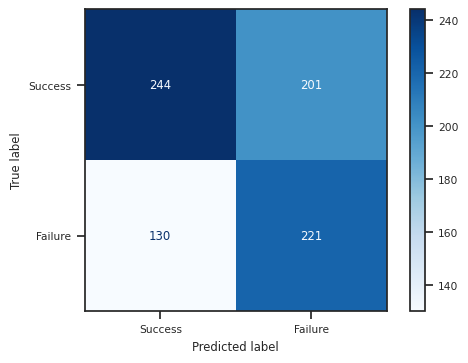

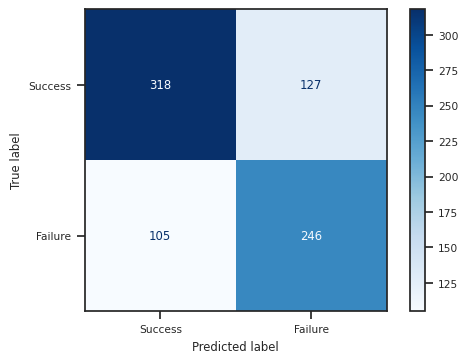

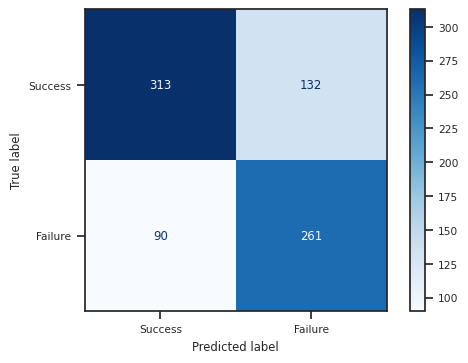

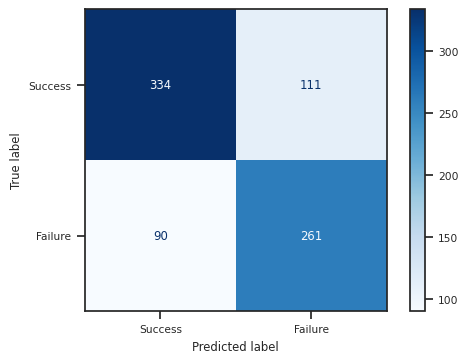

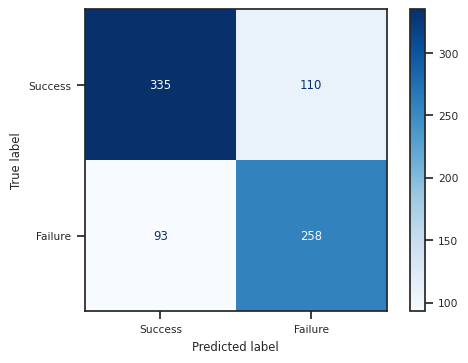

In [ ]:
count= 1
columns_temp = []
columns_to_select = []

for i in range(1, 6):
  columns_temp = df_features[df_features['round']==i]['feature'].tolist()
  print(columns_temp)
  #columns_temp.remove('target')
  columns_to_select.extend(columns_temp)
  X_train_group = X_train[columns_to_select]
  X_test_group = X_test[columns_to_select]
  clf_1 = LogisticRegression(C=1.,random_state=seed,max_iter=1000,class_weight='balanced',solver='lbfgs')
  evaluate_model(clf_1,X_train_group,y_train,X_test_group,y_test)
  print(columns_to_select)

 
  #print(row)

#### Random Forest Classifier

['isSidecar', 'type_Photo', 'type_Video', 'hour', 'is_weekend', 'minute', 'month', 'weekday']
Accuracy of classifier on training set: 0.6331
Accuracy of classifier on test set: 0.6407
F1 score of classifier on test set: 0.6460


Classification Report: 
               precision    recall  f1-score   support

     Success       0.72      0.59      0.65       445
     Failure       0.58      0.71      0.64       351

    accuracy                           0.64       796
   macro avg       0.65      0.65      0.64       796
weighted avg       0.66      0.64      0.64       796


['isSidecar', 'type_Photo', 'type_Video', 'hour', 'is_weekend', 'minute', 'month', 'weekday']
['engtrigger', 'general_topic_cancer', 'general_topic_environmental', 'general_topic_general_health', 'general_topic_inmunology', 'general_topic_mental_health', 'general_topic_nutrition', 'general_topic_other', 'post_structure_diagram_with_text_only', 'post_structure_facsheet_without_graphics', 'post_structure_header', 'po

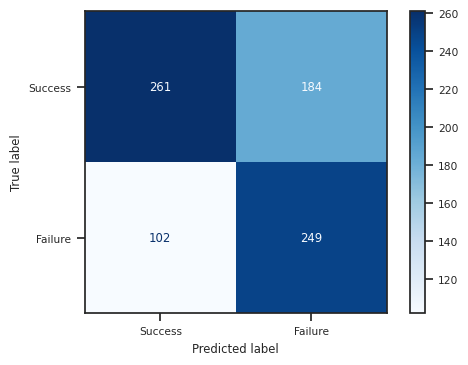

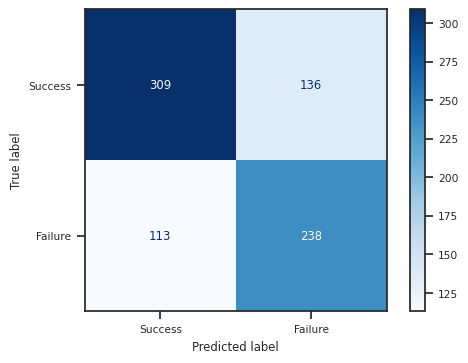

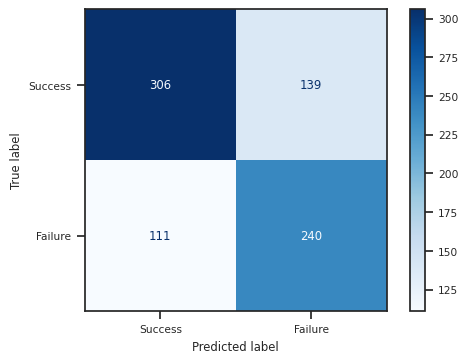

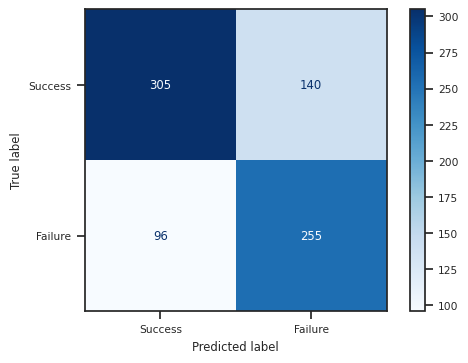

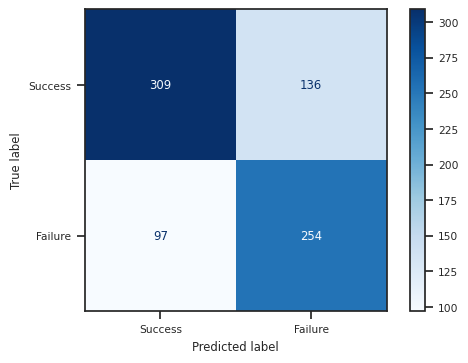

In [ ]:
from sklearn.ensemble import RandomForestClassifier

count= 1
columns_temp = []
columns_to_select = []

for i in range(1, 6):
  columns_temp = df_features[df_features['round']==i]['feature'].tolist()
  print(columns_temp)
  #columns_temp.remove('target')
  columns_to_select.extend(columns_temp)
  X_train_group = X_train[columns_to_select]
  X_test_group = X_test[columns_to_select]
  clf_1 = RandomForestClassifier(max_depth=5,min_samples_leaf=100,n_estimators=1000, random_state=seed,class_weight = 'balanced_subsample')
  evaluate_model(clf_1,X_train_group,y_train,X_test_group,y_test)
  print(columns_to_select)

#### Support Vector Classifier

['isSidecar', 'type_Photo', 'type_Video', 'hour', 'is_weekend', 'minute', 'month', 'weekday']
Accuracy of classifier on training set: 0.5754
Accuracy of classifier on test set: 0.5653
F1 score of classifier on test set: 0.5707


Classification Report: 
               precision    recall  f1-score   support

     Success       0.64      0.52      0.57       445
     Failure       0.51      0.63      0.56       351

    accuracy                           0.57       796
   macro avg       0.57      0.57      0.57       796
weighted avg       0.58      0.57      0.57       796


['isSidecar', 'type_Photo', 'type_Video', 'hour', 'is_weekend', 'minute', 'month', 'weekday']
['engtrigger', 'general_topic_cancer', 'general_topic_environmental', 'general_topic_general_health', 'general_topic_inmunology', 'general_topic_mental_health', 'general_topic_nutrition', 'general_topic_other', 'post_structure_diagram_with_text_only', 'post_structure_facsheet_without_graphics', 'post_structure_header', 'po

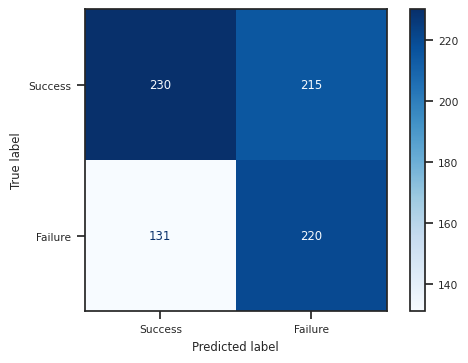

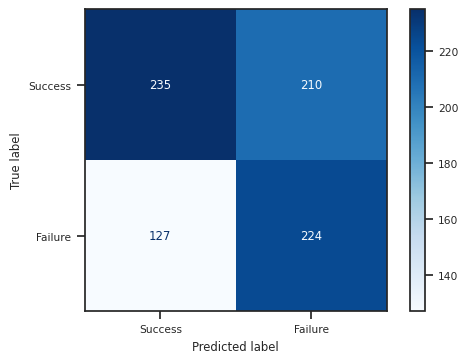

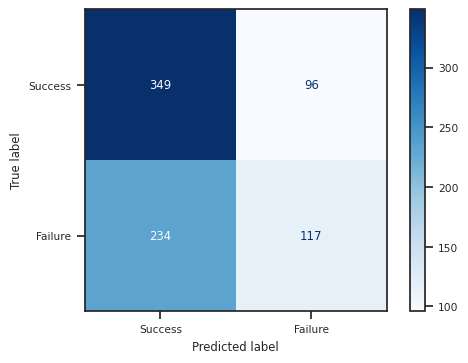

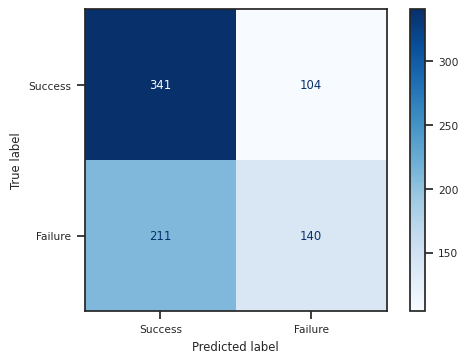

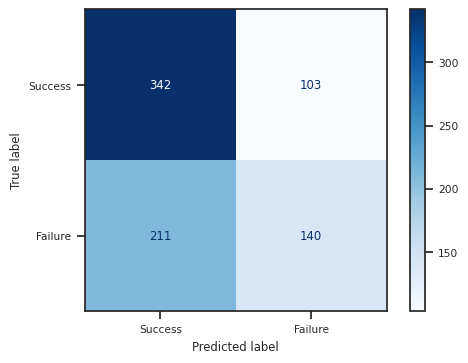

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
 

count= 1
columns_temp = []
columns_to_select = []

for i in range(1, 6):
  columns_temp = df_features[df_features['round']==i]['feature'].tolist()
  print(columns_temp)
  #columns_temp.remove('target')
  columns_to_select.extend(columns_temp)
  X_train_group = X_train[columns_to_select]
  X_test_group = X_test[columns_to_select]
  clf_1 = SVC(kernel='rbf', class_weight='balanced')
  evaluate_model(clf_1,X_train_group,y_train,X_test_group,y_test)
  print(columns_to_select)

## Final Prediction

Running the logistic regression model from sklearn, but since this model does not give us siginifcance paramters. Only focusing on prediction power, led by coefficients


Accuracy of classifier on training set: 0.7548
Accuracy of classifier on test set: 0.7349
F1 score of classifier on test set: 0.7549


Classification Report: 
               precision    recall  f1-score   support

     Success       0.78      0.73      0.75       445
     Failure       0.68      0.74      0.71       351

    accuracy                           0.73       796
   macro avg       0.73      0.74      0.73       796
weighted avg       0.74      0.73      0.74       796


CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 6.68 µs


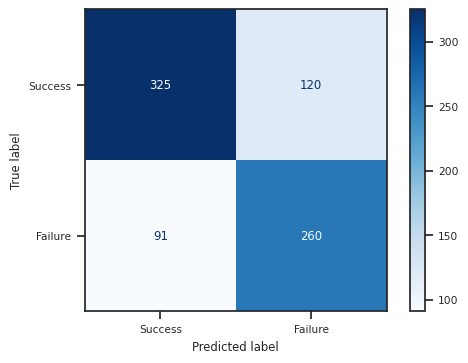

In [ ]:
clf_1 = LogisticRegression(C=1.,random_state=seed,max_iter=1000,class_weight='balanced',solver='lbfgs')

#Call the function to get results
evaluate_model(clf_1,X_train,y_train,X_test,y_test)
%time 

In [ ]:
palette = {"assent":"#171592",
           "post_structure_short_information_text":"#1B18AD", 
           "post_structure_long_information_text":"#1B18AD",
           "post_structure_facsheet_without_graphics":"#1B18AD", 
           "engtrigger":"#113DA9",
           "type_Photo":"#123DA9", 
           "general_topic_mental_health":"#2160BB",
           "month":"#4A87DE", 
           "general_topic_general_health":"#2160BB",
           "general_topic_inmunology":"#2160BB",
           "reward":"#41A8D5",
           "n_sentences":"#58C2F0",
           "differ":"#8AD9FB",
           "lb_blob_subjectivity":"#A9C6D3",
           "num_hashtags":"#A9C6D3",

           
           }

Text(0.5, 1.0, 'Feature Importance')

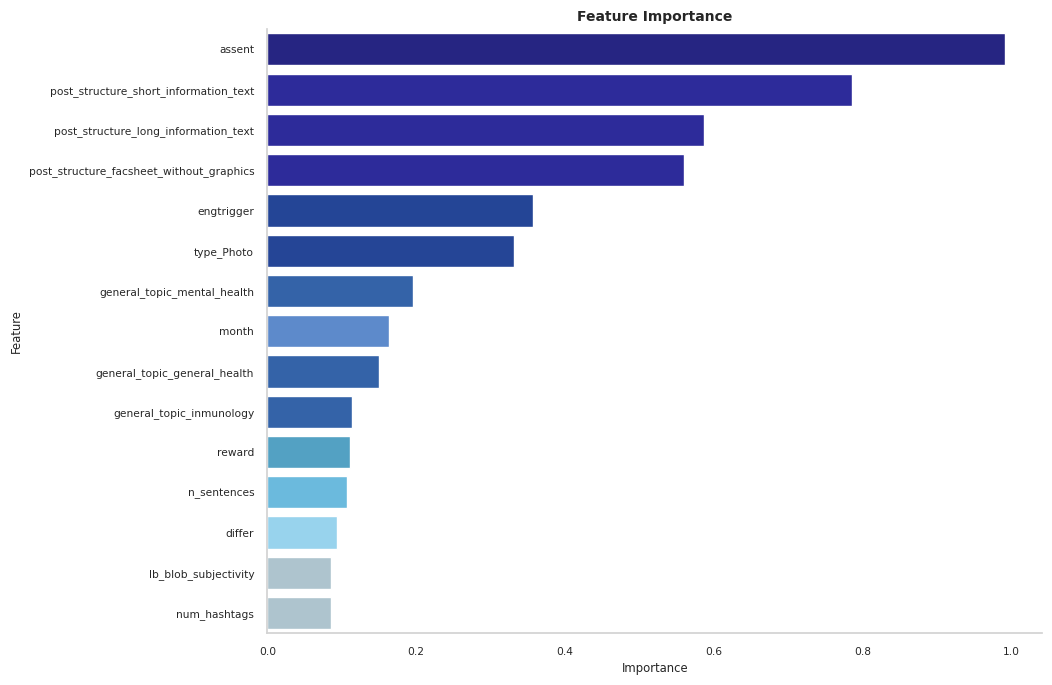

In [ ]:
sns.set(style="white",font_scale=0.7)
#sns.set_context(rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5}) 
name = X_train.columns.tolist()
imp = clf_1.coef_[0]
# summarize feature importance
df_feat = pd.DataFrame({'Feature': name, 'Importance': imp})
df_feat = df_feat.sort_values('Importance', ascending=False)[:15]
ax=sns.barplot(x='Importance', y='Feature', data=df_feat, palette= palette)
ax.figure.set_size_inches(10,8)
ax.grid(False) 
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Feature Importance",fontdict= { 'fontsize': 10, 'fontweight':'bold'})

  
#b.axes.set_title("Title",fontsize=50)
#b.set_xlabel("X Label",fontsize=30)
#b.set_ylabel("Y Label",fontsize=20)
#b.tick_params(labelsize=5)

## Statistical Significance

In this section, we are looking to identify the isolated contribution of each feature, for that we test its significance towards our target variable.

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = X_train[considered_features].astype(float) 
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
# features to consider removing
considered_features = X_train.columns

considered_features = [x for x in considered_features if not x.startswith('post_structure')]
considered_features = [x for x in considered_features if not x.startswith('general_topic')]
#considered_features = [x for x in considered_features if not x.startswith('engtrigger')]
#considered_features = [x for x in considered_features if not x.startswith('ad_type')]
considered_features = [x for x in considered_features if not x.startswith('type')]


considered_features.remove('lb_vader_neu')
considered_features.remove('lb_vader_compound')
considered_features.remove('lb_vader_pos')
considered_features.remove('WC')
considered_features.remove('n_characters')
considered_features.remove('syllable_count')
considered_features.remove('Conversation')
considered_features.remove('n_stopwords')
considered_features.remove('n_sentences')
considered_features.remove('Culture')
#considered_features.remove('Culture')
considered_features.remove('lb_blob_polarity')
considered_features.remove('lb_vader_neg')
#considered_features.remove('Linguistic')
#considered_features.remove('target')

In [ ]:
# compute vif
# main objective is that VIF <5 so we can get the correct significance of isolated effects
compute_vif(considered_features).sort_values('VIF', ascending=False).head(100)

,Variable,VIF
27,ppron,3.11
9,assent,2.78
5,Social,2.63
16,is_weekend,2.60
31,weekday,2.58
23,motion,2.28
30,tentat,2.16
26,p_stopwords,2.07
0,Analytic,2.04
28,reward,1.96


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [ ]:
# clean features without colinearity 
#considered_features.remove('minute')
str_var = '+'.join(considered_features)
print(str_var) 

Analytic+Authentic+BigWords+Comma+Physical+Social+WPS+achieve+adj+assent+day+det+differ+engtrigger+hour+isSidecar+is_weekend+lb_afinn+lb_blob_subjectivity+lb_rberta_pred+lb_rberta_score+minute+month+motion+n_tokens+num_hashtags+p_stopwords+ppron+reward+tech+tentat+weekday


In [ ]:
formula = 'target ~ '+str_var 
formula

'target ~ Analytic+Authentic+BigWords+Comma+Physical+Social+WPS+achieve+adj+assent+day+det+differ+engtrigger+hour+isSidecar+is_weekend+lb_afinn+lb_blob_subjectivity+lb_rberta_pred+lb_rberta_score+minute+month+motion+n_tokens+num_hashtags+p_stopwords+ppron+reward+tech+tentat+weekday'

In [ ]:
#adding labels back to the trainset

X_train_glm = X_train
X_train_glm['target'] = y_train


X_test_glm = X_test
X_test_glm['target'] = y_test

X_train_glm.head(2)


,Analytic,Authentic,BigWords,Comma,Conversation,Culture,Physical,Social,WC,WPS,...,post_structure_facsheet_without_graphics,post_structure_header,post_structure_infographic,post_structure_long_information_text,post_structure_no_informational_post,post_structure_other,post_structure_short_information_text,type_Photo,type_Video,target
1302,89.52,47.26,16.13,1.61,1.61,1.61,3.23,11.29,62,10.33,...,0,1,0,0,0,0,0,1,0,0
1204,74.65,23.08,16.41,3.13,0.78,1.56,14.06,7.03,128,18.29,...,0,1,0,0,0,0,0,1,0,0


**Main takeaways:**

Features that are significant

* WPS (mean words per sentence), the less words per sentence the better.
* The more reference to success and	failure  (achievement	striving) the better
* Usage of affirmative words like: agree, OK, yes increase likelihood of engagement
* The less usage of determinants like the, at, that, my the better engagement
* The more negative the sentiment the better
* The more forward in the year the better
* The more words frequently used in social media and text messaging the better
* The more hashtags the better engagement success
* Less reference to tech words the better: phone, email
* Less usage of tentative words like if,any,or, something like the better

In [ ]:
##applying the model
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula = formula, data=X_train_glm, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                 1856
Model:                            GLM   Df Residuals:                     1823
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1022.0
Date:                Wed, 28 Sep 2022   Deviance:                       2043.9
Time:                        11:12:57   Pearson chi2:                 1.87e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.2740 

In [ ]:
results_summary=result.summary()

results_as_html = results_summary.tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,8.27,3.84,2.16,0.03,0.75,15.79
isSidecar[T.True],-0.14,0.17,-0.86,0.39,-0.47,0.18
Analytic,-0.00,0.00,-1.56,0.12,-0.01,0.00
Authentic,0.00,0.00,0.34,0.73,-0.00,0.01
BigWords,0.00,0.01,0.16,0.87,-0.01,0.01
Comma,-0.02,0.01,-1.38,0.17,-0.05,0.01
Physical,0.00,0.01,0.14,0.89,-0.02,0.02
Social,0.01,0.01,0.89,0.38,-0.01,0.04
WPS,-0.04,0.01,-4.43,0.00,-0.05,-0.02
achieve,0.14,0.03,4.13,0.00,0.07,0.21


In [ ]:
predictions = result.predict(exog=X_train_glm)
predictions = np.where(predictions >0.5, 1, 0)

In [ ]:
##Results for train set

cm = confusion_matrix(y_train, predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, predictions))

Confusion Matrix : 
 [[536 272]
 [257 791]]
Test accuracy =  0.7149784482758621


In [ ]:
##Results for test set

predictions = result.predict(exog=X_test_glm)
predictions = np.where(predictions >0.5, 1, 0)

cm = confusion_matrix(y_test, predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, predictions))

Confusion Matrix : 
 [[216 135]
 [100 345]]
Test accuracy =  0.7047738693467337


Conclusion: When we add all the text related features our accuracy improves up to 70% in evaluation set.

##  Permutation Importanca - Additional Findings 
In this section, we try fitting a random forest to find permutational importance and the impact of keywords in accuracy 

In [ ]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.2 MB/s 
     |████████████████████████████████| 13.1 MB 52.8 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=0d4653c875c0bc432387648739a8a8e3e6d9e1feeece13992449e076dcfe2dff
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ab483d06ec7c04a3ebe91c6170859c3ad8a8f0ae7aca5546d7d59330ebe01588
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 16.3 MB/s 
     |████████████████████████████████| 133 kB 62.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0589677cca5fd2b408534b62b76aa9e15a1cf4c62ca12a77610b6c87baa7db98
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
from eli5.sklearn import PermutationImportance
import eli5
from sklearn.feature_extraction import text
from pdpbox import pdp, get_dataset

In [ ]:
lst_columns = list(df_final.columns)
lst_columns.append("clean_text")

In [ ]:
df_copy = df[np.intersect1d(df.columns, lst_columns)]

In [ ]:
#df_copy = df_copy[df_copy['clean_text'].notna()]

In [ ]:

my_stop_words = text.ENGLISH_STOP_WORDS.union(["medium","juice"])

In [ ]:
## add text features : top 100
vec = TfidfVectorizer(max_features=100, ngram_range=(1, 2), lowercase=True, stop_words=my_stop_words, min_df=6)
X = vec.fit_transform(df_copy['clean_text'].values.astype('U'))

In [ ]:
label = df_copy.target
features = [c for c in df_copy.columns if c not in ["target", "text","clean_text"]]

In [ ]:
#def clean_name(x):
#    words = x.lower().split()
#    cln = [wrd for wrd in words if not wrd[0].isdigit()]
#    return " ".join(cln)
#df["cleaned_name"] = df["name"].apply(lambda x : clean_name(x))

## add text features : top 100
#vec = TfidfVectorizer(max_features=100, ngram_range=(1, 2), lowercase=True, stop_words="english", min_df=6)
#X = vec.fit_transform(df['clean_text'].values)

## append to original dataframe
vectors_df = pd.DataFrame(X.toarray(), columns=["_"+xx for xx in vec.get_feature_names()])
projects1_df = pd.concat([df_copy[features], vectors_df], axis=1)

## train the model
X_train, X_test, y_train, y_test = train_test_split(projects1_df, label, test_size = 0.25, random_state = 2)
X_train2, y_train2 = X_train[:15000], y_train[:15000]
X_test2, y_test2 = X_test[:1000], y_test[:1000]
model2 = RandomForestClassifier(random_state=seed).fit(X_train2, y_train2)
y_pred = model2.predict(X_test2)

from plotly import tools

perm = PermutationImportance(model2, random_state=seed).fit(X_test2, y_test2)
pi_df = eli5.explain_weights_df(perm, feature_names = X_test2.columns.tolist(), feature_filter=lambda x: x[0] == '_')
pi_df["feature"] = pi_df["feature"].apply(lambda x : x[1:])
highs = pi_df[pi_df.weight >= 0.001].head(15)
med = pi_df[(pi_df.weight > -0.0005) & (pi_df.weight < 0.001)]
lows = pi_df[pi_df.weight <= -0.0005].head(15)

trace1 = go.Bar(
        orientation = "h",
        y = highs.feature[::-1],
        x = highs.weight[::-1],
        marker = dict(opacity = 0.4, color = "green" ), error_x = dict(type='data', color="#9fa3a3", array=list(highs["std"][::-1]), visible=True))
trace2 = go.Bar(
        orientation = "h",
        y = med.feature[:15][::-1],
        x = med.weight[:15][::-1],
        marker = dict(opacity = 0.4, color = "gray"), error_x = dict(type='data', color="#9fa3a3", array=list(med["std"][:15][::-1]), visible=True))
trace3 = go.Bar(
        orientation = "h",
        y = lows.feature,
        x = lows.weight,
        marker = dict(opacity = 0.4, color = "red"), error_x = dict(type='data', color="#9fa3a3", array=list(lows["std"][::-1]), visible=True))

ttls = ["Positive Impact","", "Moderate + or - Impact" ,"", "Negative Impact"]
fig = tools.make_subplots(rows=1, cols=5, print_grid=False, subplot_titles = ttls)
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",

    #title_font_family="Times New Roman",
    #title_font_color="red",
    #legend_title_font_color="green"
)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 5)

fig['layout'].update(showlegend=False, title='<b>Impact of Words Used in Post Description - Permutation Importance</b>')
fig.update_layout(title_x=0.5)
iplot(fig, filename='simple-subplot-with-annotations')

In [ ]:
highs = pi_df[pi_df.weight >= 0.001].head(15)

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
highs

,feature,weight,std
0,heal,0.0094,0.0011
1,win,0.0081,0.0036
2,diet,0.0066,0.0025
3,drop agree,0.0060,0.0033
4,sugar,0.0057,0.0031
5,fix,0.0057,0.0020
6,help,0.0057,0.0020
7,make,0.0051,0.0026
8,free,0.0048,0.0015
9,drop,0.0048,0.0029


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_copy[features], label, test_size = 0.025, random_state = seed)
X_train1, y_train1 = X_train, y_train
X_test1, y_test1 = X_test, y_test

## train a random forest classifier 
model1 = RandomForestClassifier(n_estimators=50, random_state=seed).fit(X_train1, y_train1)
y_pred = model1.predict(X_test1)

In [ ]:

def _plot_pdp(feature, pdp_color, fill_color):
    plot_params = {
        'title': feature.title() + ' - Partial Dependency Plot',
        'title_fontsize': 15,
        'subtitle': 'How changes in "%s" affects the model predictions' % feature.title(),
        'subtitle_fontsize': 12,
        'font_family': 'Calibri',
        'xticks_rotation': 0,
        'line_cmap': 'cool',
        'zero_color': '#a2a5a0',
        'zero_linewidth': 1.0,
        'pdp_linewidth': 2.0,
        'fill_alpha': 0.25,
        'markersize': 5.5,
        'pdp_hl_color': 'green',
        'pdp_color': pdp_color,
        'fill_color': fill_color,

    }
    pdp_goals = pdp.pdp_isolate(model=model1, dataset=X_test1, model_features=X_test1.columns, feature=feature)
    pdp.pdp_plot(pdp_goals, feature, plot_params = plot_params)
    plt.ylabel("Change in Model Predictions",fontname = 'Times New Roman');
    plt.show();
    
cols_of_interest = ['n_tokens', 'WPS','assent','achieve','det','lb_afinn','num_hashtags','tech','tentat','minute','month']

#_plot_pdp(cols_of_interest[0], "#2554C8", "#5482F4")

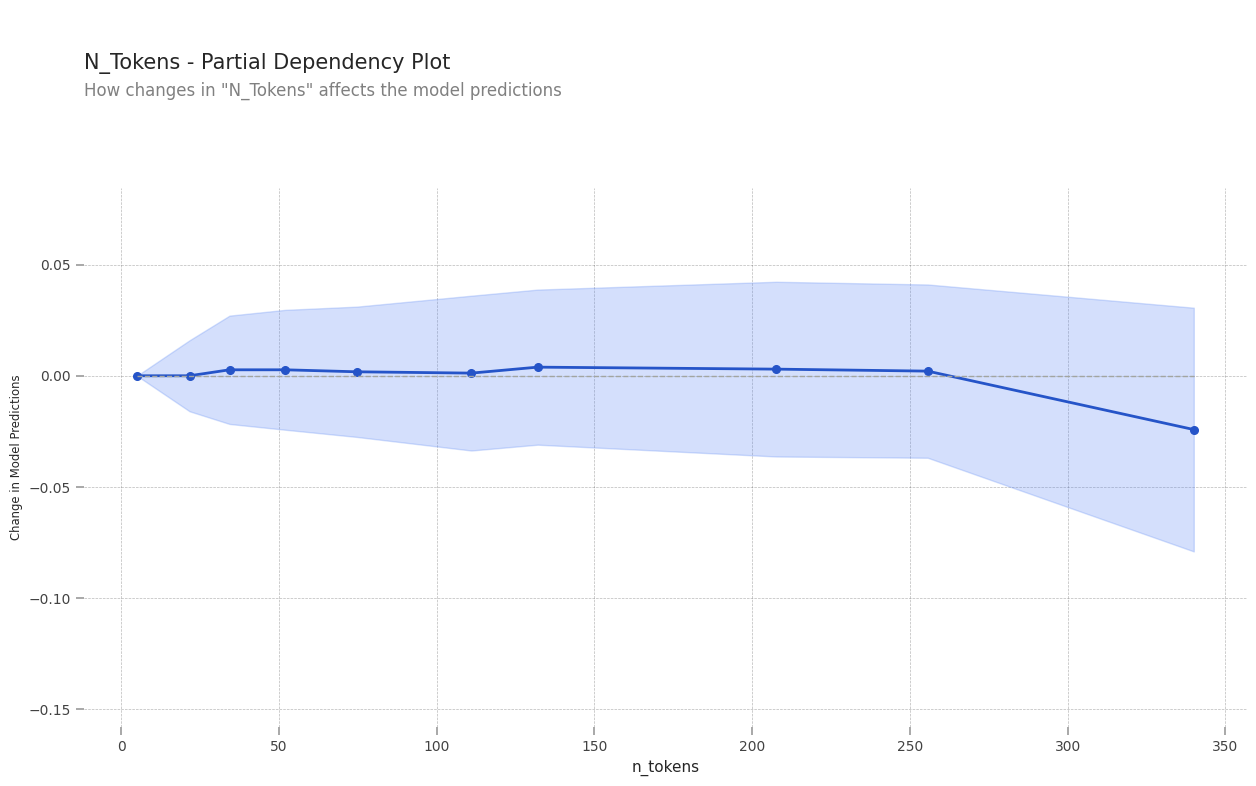

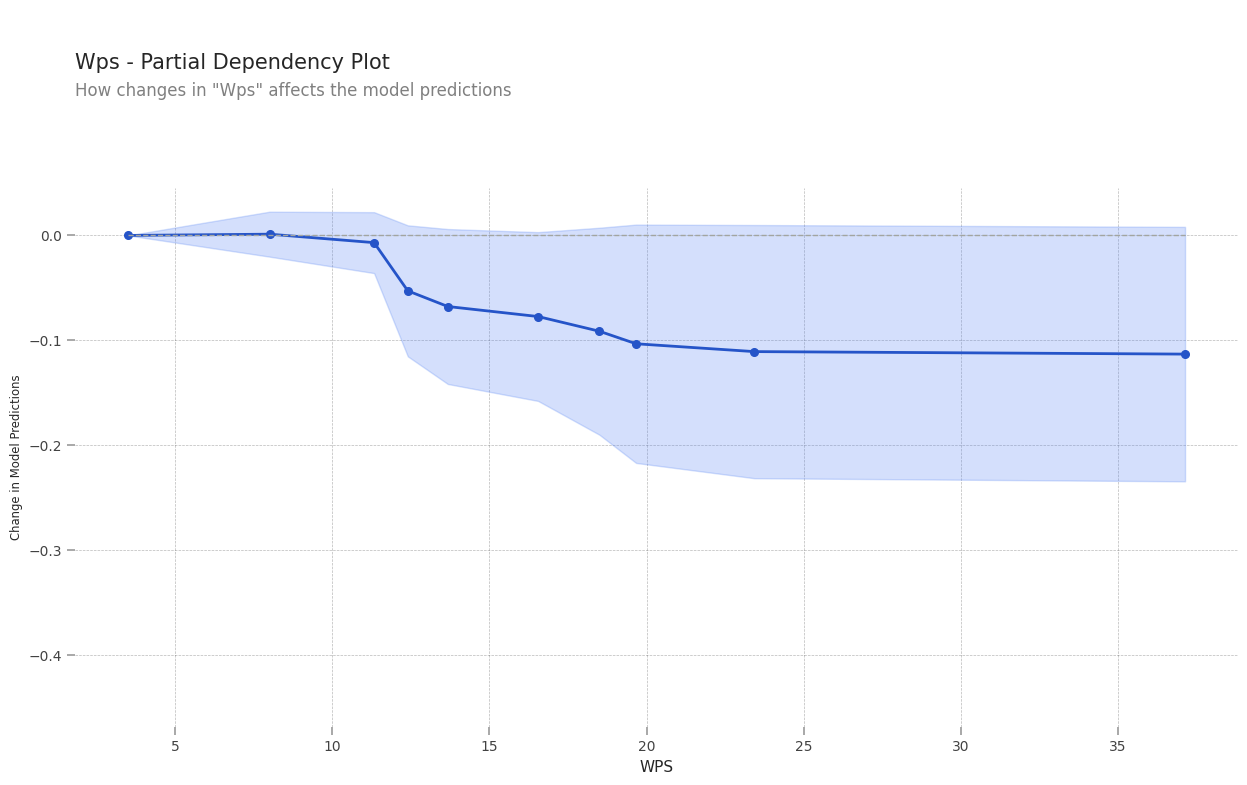

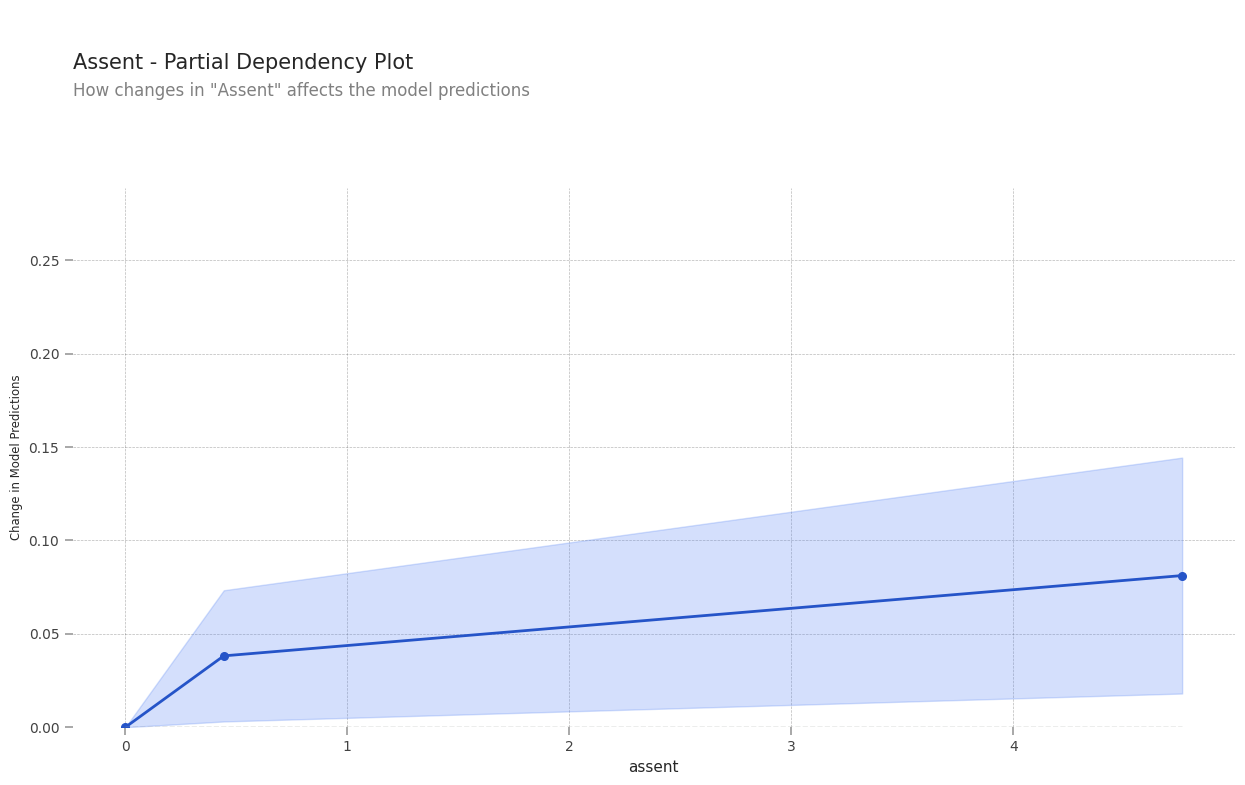

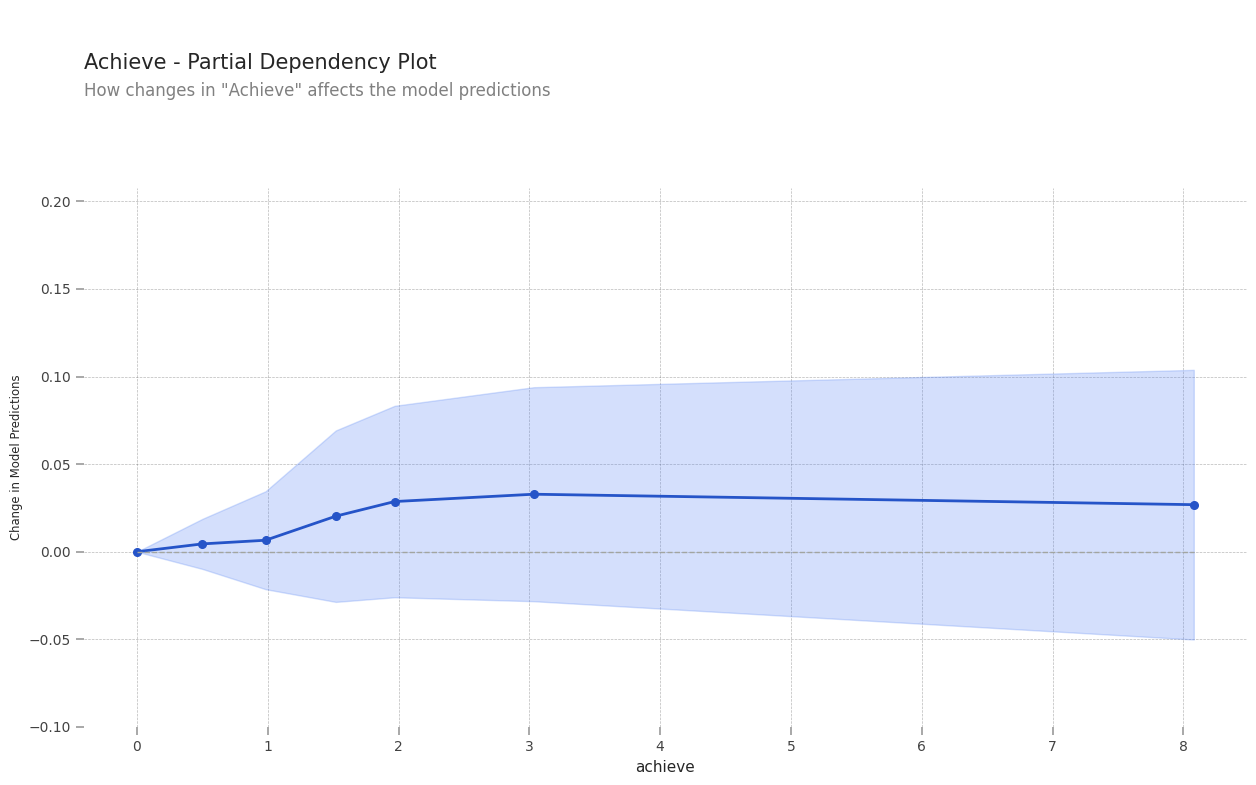

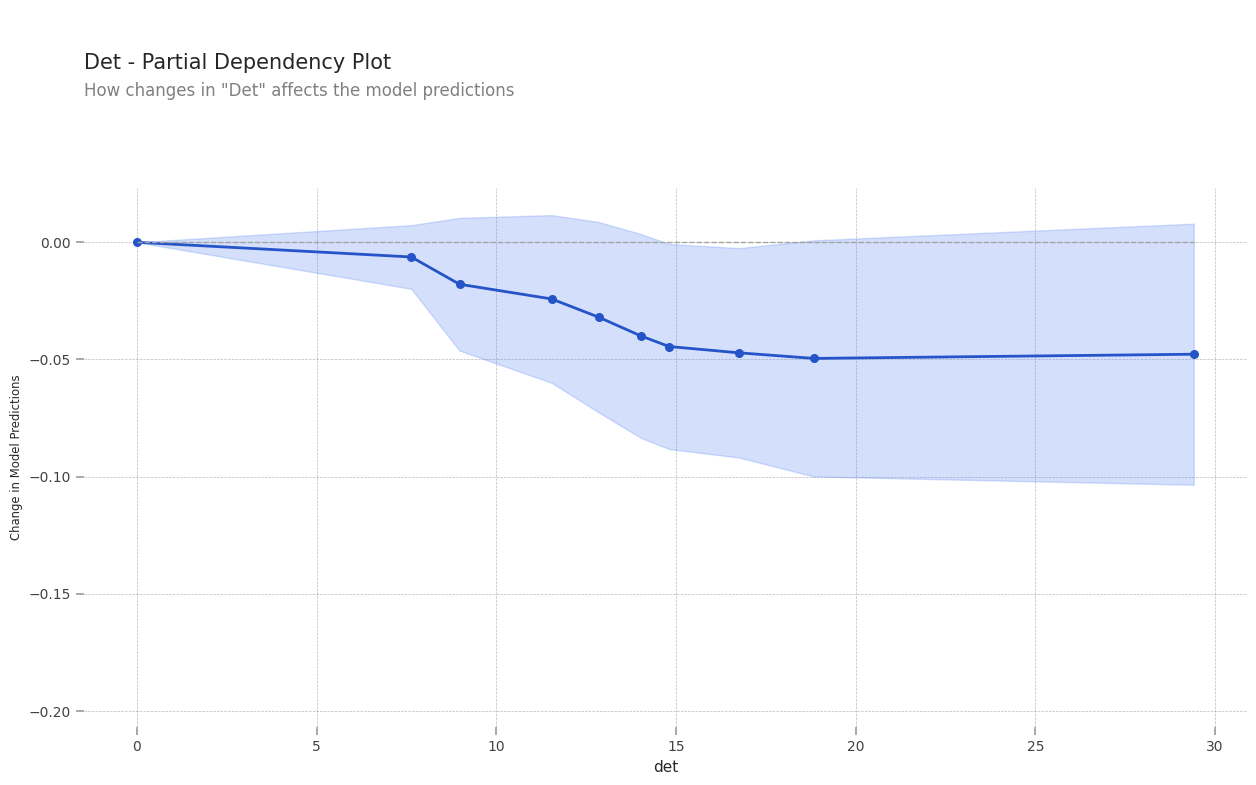

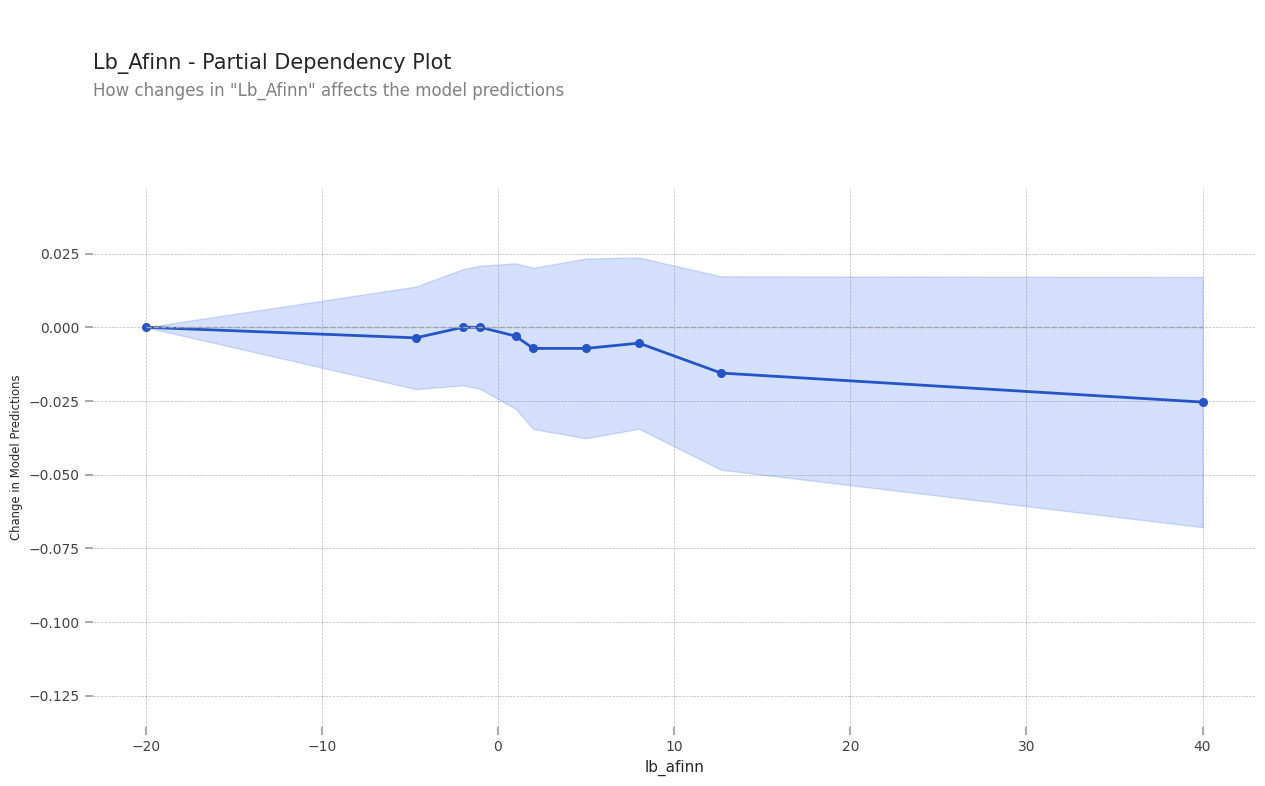

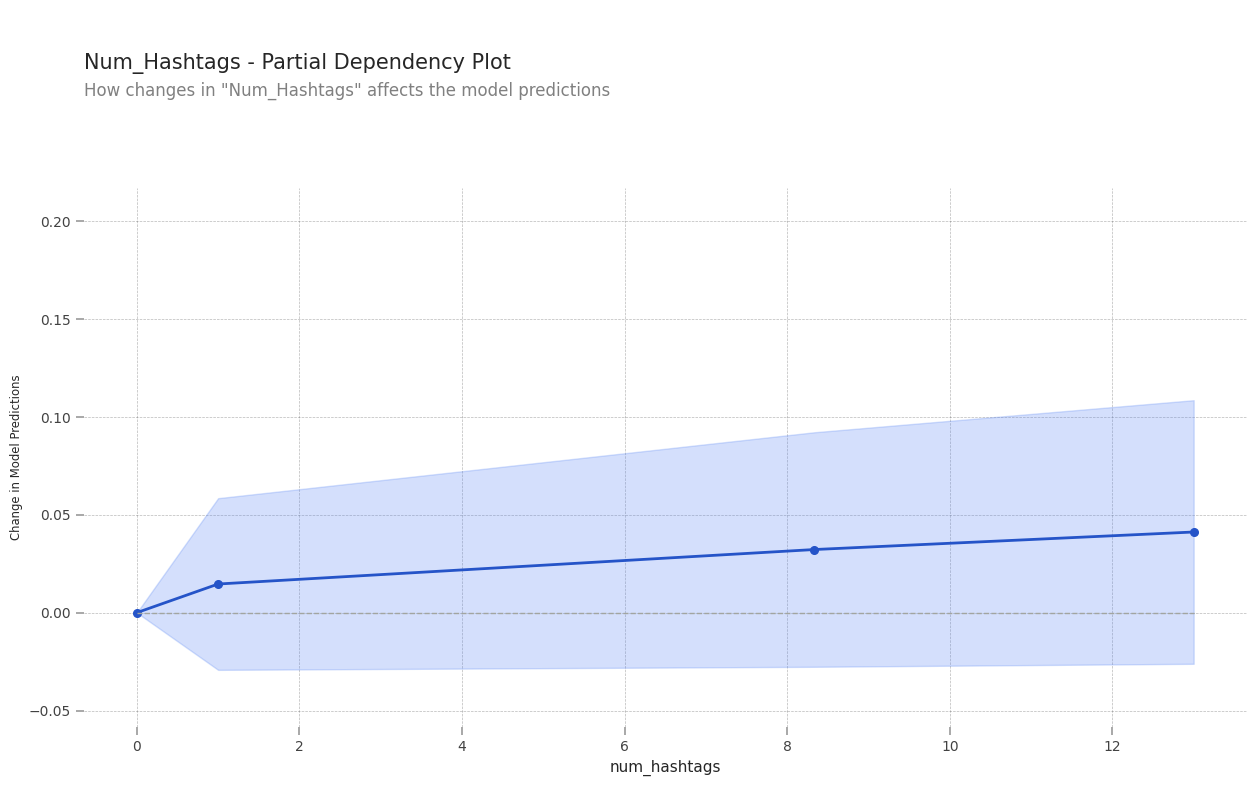

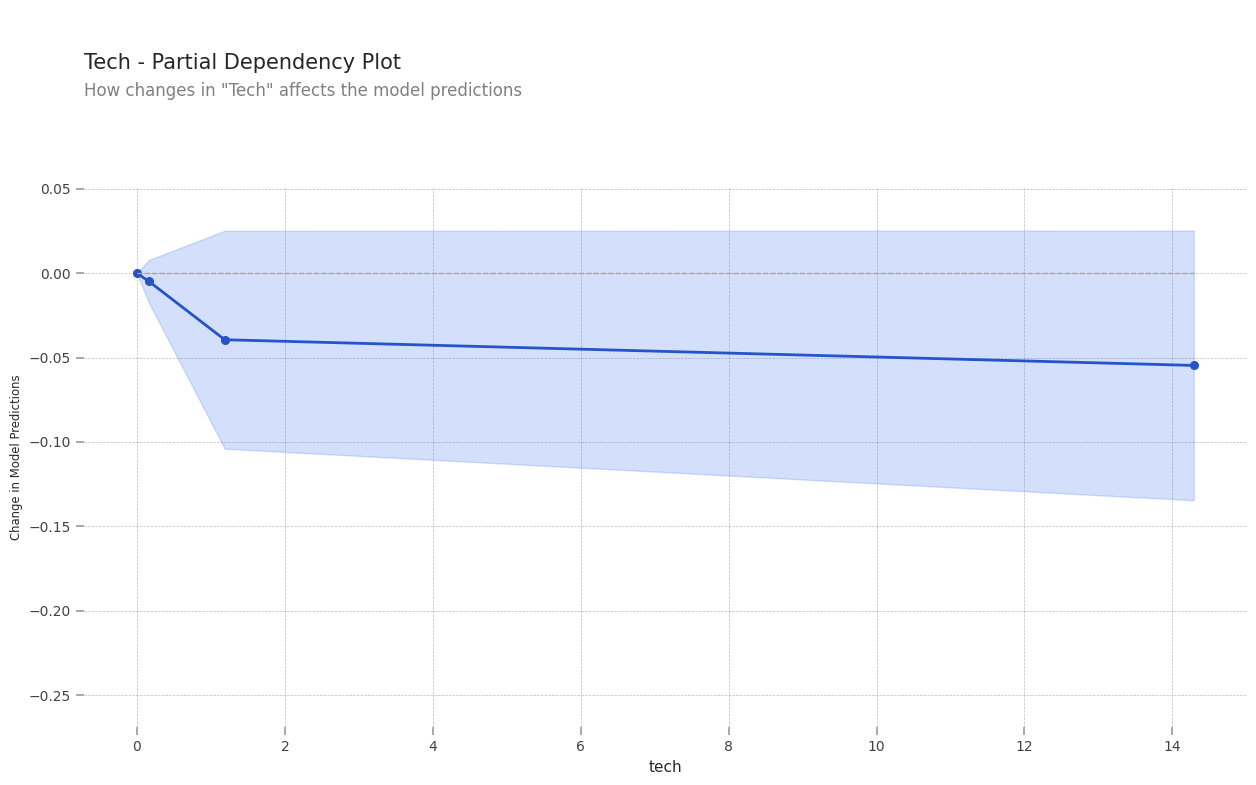

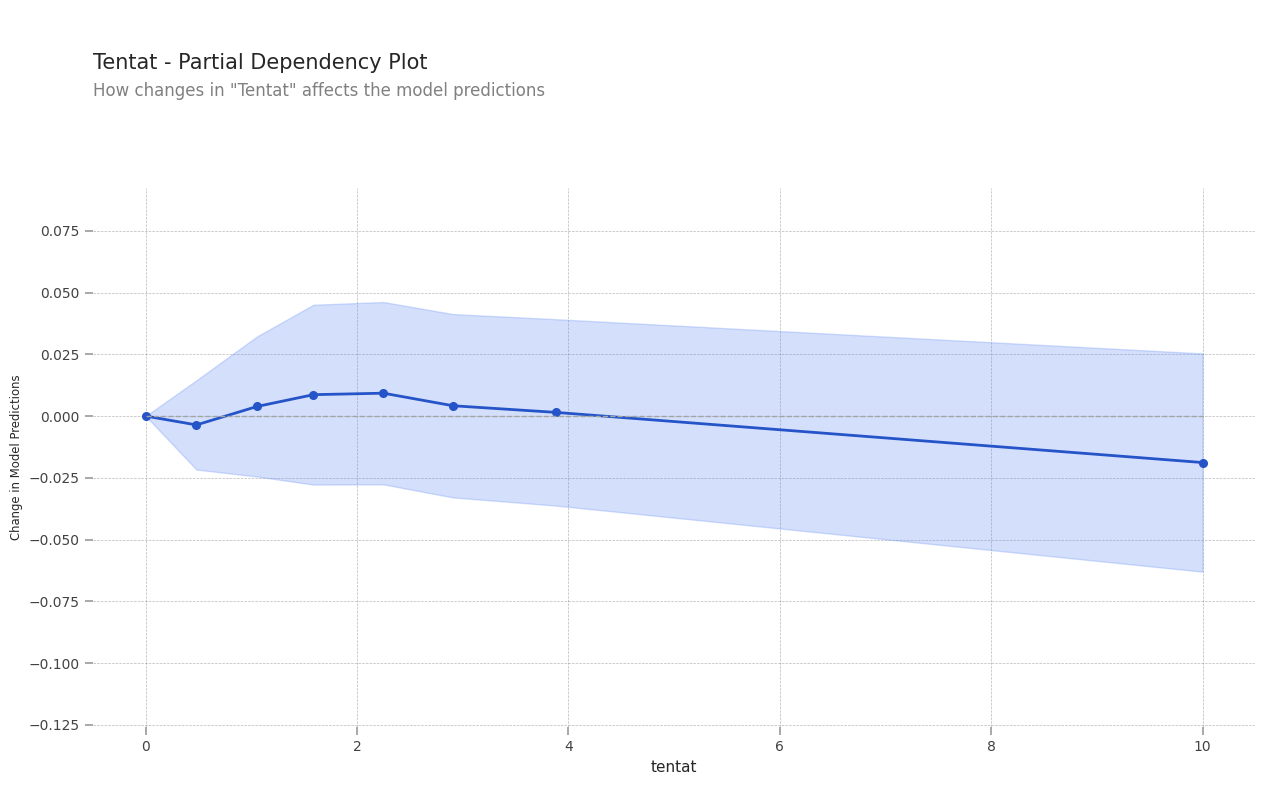

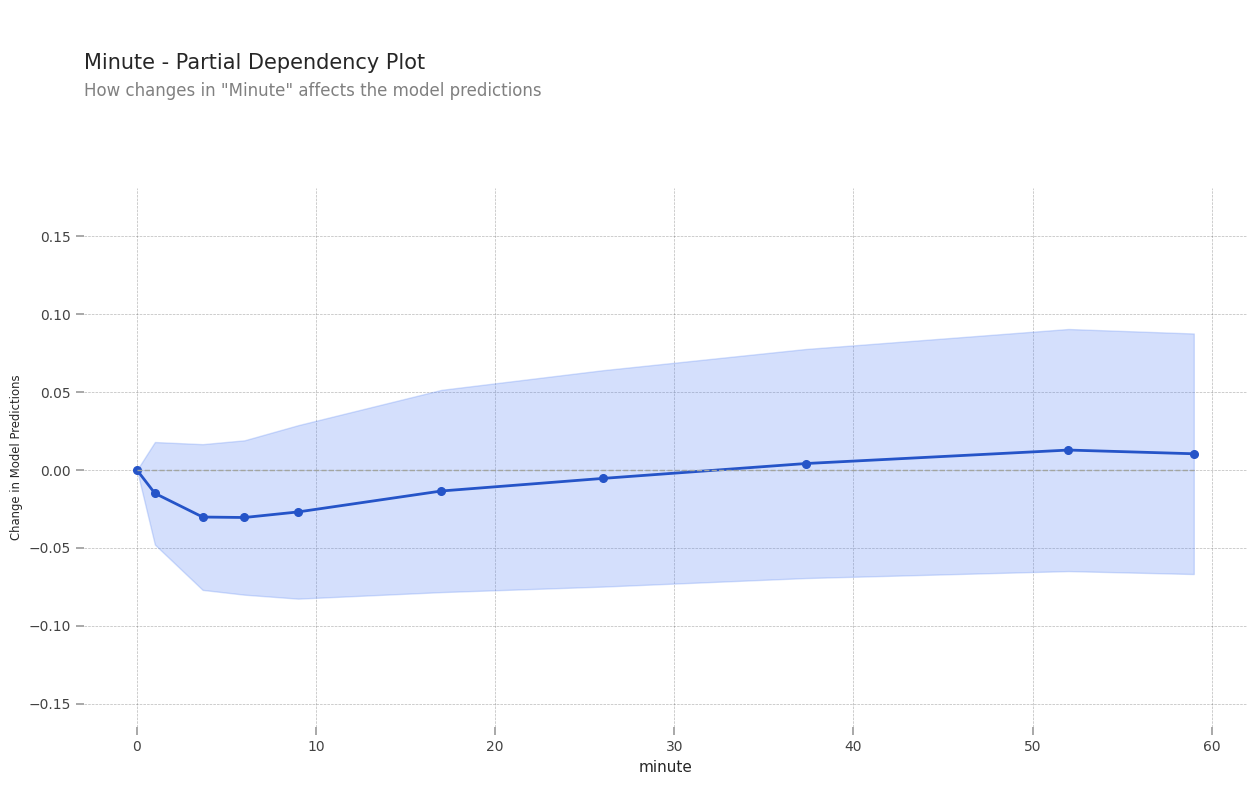

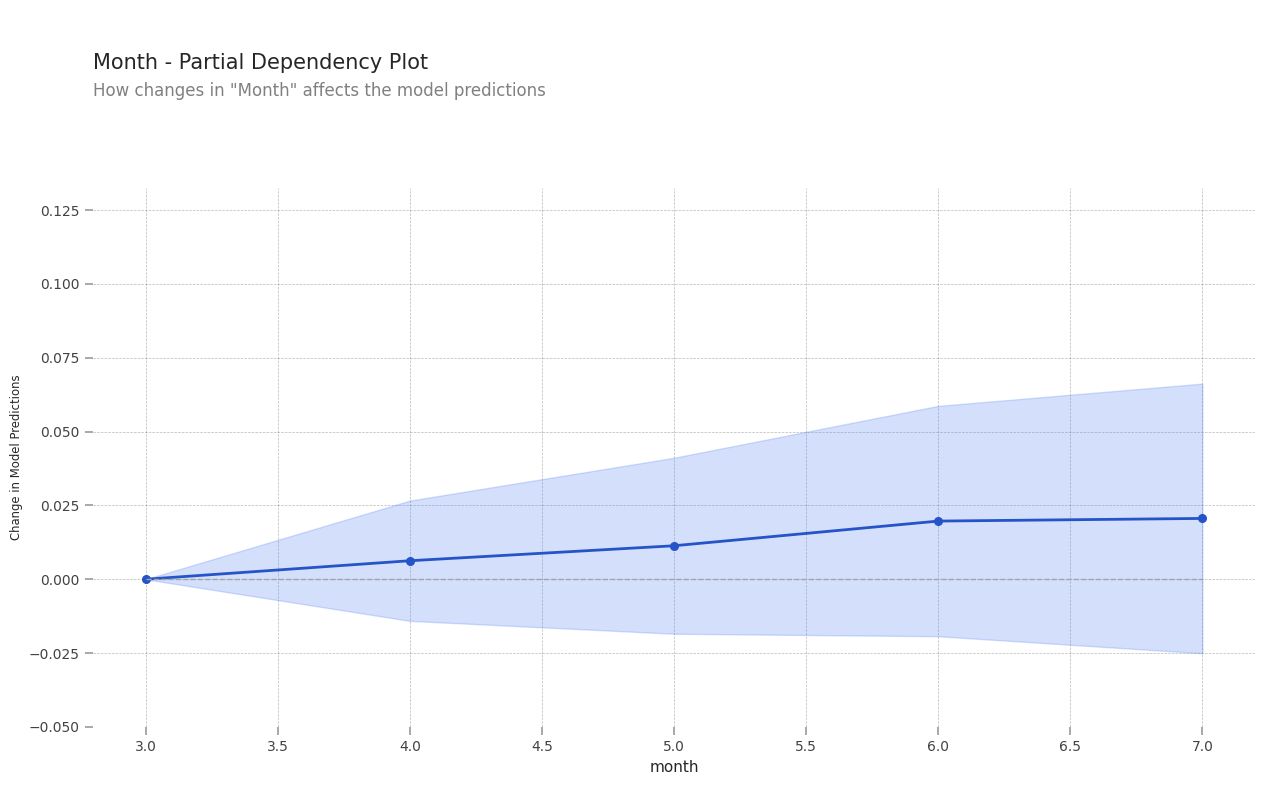

In [ ]:
for i in range(0,11):
  _plot_pdp(cols_of_interest[i], "#2554C8", "#5482F4")